# Fraud Detection on Credit Card Transactions V4

Sections:<br>
1. [Introduction](#Introduction)<br>
1. [Data Exploration](#Data-Exploration)<br>
2. [Dataset](#Dataset) <br>
3. [Data Preprocessing](#Data-Preprocessing) <br>
4. [Evaluation metrics](#Evaluation-metrics) <br>
5. [LightGBM](#LightGBM)<br>
5. [Logistic Regression](#Logistic-Regression)<br>
7. [Random Forest](#Random-Forest)<br>
6. [Conclusion](#Conclusion)<br>
7. [References](#References)

# Introduction

### The problem

Credit card fraud occurs when an unauthorized person gains access to your information and uses it to make purchases. 

There are two distinct types of card fraud: (1) card-not-present fraud, i.e. fraud conducted remotely in online and telephone payments, using card details obtained by scams such as phishing.; and (2) card-present fraud, which typically occurs at retail outlets and ATMs and involves the use of counterfeit/skimmed cards.

Card fraud is one of the most prevalent kinds of fraud in the world that amounts to billions of financial losses annually. Over time multitude of solutions have been introduced to fight this multifaceted crime, ranging from replacement of magnetic swipe cards with chip card to sophisticated AI-driven fraud detection systems. While these approaches have proven beneficial, criminals are adapting, and fraud is still present to similar extent. Thus affected parties need to remain vigilant, and refine their detection methods.

### Statistics

Recent statistics provided by the [Eurosystem](https://www.ecb.europa.eu/pub/pdf/cardfraud/ecb.cardfraudreport202110~cac4c418e8.en.pdf):
1. Card fraud in 2019 amounted to €1.87 billion(0.036%) of the total value of card payments €5.16 trillion made using cards issued in the Single Euro Payments Area (SEPA). Card fraud in 2021 continued its downward trend, falling to its lowest level since data collection began. It constituted 0.028%. The highest share of card fraud observed to date was 0.048% in 2008. 
2. Delayed debit and __credit card transactions__ (0.088% from total fraud share) appear more affected by fraud than debit card payments(0.016%).
3. More than half of the total value of fraud in 2019 was related to __cross-border transactions__ within SEPA.
4. From a geographical perspective, domestic transactions accounted for 89% of the value of all card transactions in 2019, but only 35% of fraudulent transactions. Cross-border transactions within SEPA represented 9% of all card transactions in terms of value, but 51% of those reported fraud.

USA statistics:<br>
1. Financial losses in 2021 amounting to $32.34 billions have increased compared to previous years. More data [here](https://www.bankrate.com/finance/credit-cards/credit-card-fraud-statistics/#fraud).
2. Most common age range to experience fraud in 2021 is 30-39. They represent one-third of credit card fraud reports among all age groups.

### Techniques and challenges

Anti-fraud prevention is done by analyzing user behavior patterns, transaction details, and many other signals like login, money transfer operations that help specialists make informed decisions.

There are countless transaction fraud schemes, with new vectors of attack emerging often. Some of the __challenges__ of developing fraud detection tools include:
- __false positives__ - Occurs when monitoring system is imprecise, and places false flags on legitimate cases.
- __complex rules__ - With a lot of complex rules in place, monitoring cases gets difficult and scaling becomes a challenge as the system will not be able to keep up with demand.
- __unusual transactions__ - Fraudsters will go to lengths to conceal their activity. Detecting sophisticated fraud or ML/TF patterns requires a well-designed detection system .
- __risk-based optimization__ - Finding the balance between strong protection and optimal conversion rates is difficult, as the process has to be customized for various risk levels, user groups, and regions. 
- __insufficient case management__ - Poor delegation of casework, low-quality inspection tools, and inconclusive data analysis leads to overlooked cases.

__Fraud Detection Techniques__<br>
Techniques for fraud detection typically include data analysis in some form. Such approaches can be broadly classified into AI-based and statistical data analysis methods.

 - _Statistical analysis_ - 
As the name suggests, this includes different statistical operations like evaluating different _statistical parameters_(average, quantiles, metrics etc.), _probability distributions and models_, _data matching_, _regression analysis_.


 - _AI-based approach_ - 
AI has emerged as the clear front-runner in the race for more efficient scam detection technologies, widely used are _Machine Learning (ML)_ algorithms learning from historical fraud patterns and recognizing them in future transactions, and Neural Networks.

__Fraud Detection and Prevention Systems__

They operate in real-time so that financial institutions can prevent fraud while ensuring a seamless customer experience. A robust real-time fraud prevention system consists of:

1. The ability to ingest transaction streams: Access to transaction data as soon as it occurs for analysis, including relevant details like user details, amounts, IP addresses, and more. An example streaming platform is Apache Kafka.
2. A way to analyze these transactions for potential fraud: Algorithms or ML models to detect fraud patterns and anomalies, adaptable to evolving fraud tactics. The most common stream processing platform is Apache Flink.
3. A system to monitor and act on your analysis in real-time: Triggers for alert generation, transaction blocking, and manual review, along with a user-friendly dashboard for trend tracking and strategy decisions. The ideal way to achieve both ends is through an API layer. 
   - Popular choices of frameworks include Node.js, Ruby on Rails, Django or Flask for Python, and Spark or Spring for Java.
   - Analyzed fraud data is usually stored in a data warehouse, such as BigQuery, Snowflake, or Redshift. Then, it can be queried and visualized in business intelligence tools like Tableau, Looker, or PowerBI.

### Objective

This project is intended to explore combination of Machine Learning techniques and methods to gather insights specifically for the problem of fraud detection in bank transactions.

# Data Exploration

This step will help identify patterns in fraud transactions, which we'll use for feature selection later (the features we'll input in the models). Additionally the identified patterns or most relevant features can be highlighted through feature engineering techniques so we improve the model performance.

In another project I explored two transaction datasets to find out if common hypothesis about fraud transaction patterns still hold true, and found other patterns specific to the datasets. Since I'll use one of the datasets for this project(dataset 2), I'm sharing the results from that exploration as well. You can find the full project [here](https://www.kaggle.com/code/aysunaliosman/fraud-detection-on-credit-card-transactions-v1).

#### Conclusion of the previous exploration of 2 datasets

We can definitely say there are significant differences in the patterns of both datasets:

| Hypothesis | dataset 1 | dataset 2 |
|----------|----------|----------|
| Most fraud happens outside customer's country  | All fraud in USA area  | All fraud outside of USA   |
| Fraud is done during late hours  | 22:00 - 3:00   | 05:00 - 14:00   |
| Age range 30-39 experiences most card fraud | average age: 49 |  not enough data |
| There are small amount fraud transactions done to test the ground  | There are small amounts but it's not always the first transaction from the series |   Same as dataset 2 |

# Dataset

A simulated credit card transaction dataset by [IBM](https://github.com/IBM/TabFormer/tree/main). There are over 24 million records with duration 1991 - 2020. For the sake of faster computation the dataset will be truncated to around 10 million cases.

The features are initially 15:
- __User__ - Unique customer number<br>
- __Card__ - Card number, max 9 cards per user <br>
- __Year__ - Year of transaction <br>
- __Month__ - Month of transaction <br>
- __Day__ - Day of transaction <br>
- __Time__ - Hour of transaction <br>
- __Amount__ - Amount of transaction in $ <br>
- __Use Chip__ - Type of payment <br>
- __Merchant Name__ - Name of Merchant <br>
- __Merchant City__ - City of Merchant <br>
- __Merchant State__ - State of Merchant <br>
- __Zip__ - Zip of Merchant <br>
- __MCC__ - Merchant Category Code (MCC) is a four-digit number listed in ISO 18245 for retail financial services. An MCC is used to classify a business by the types of goods or services it provides.<br>
- __Errors?__ - Errors that occured during transaction <br>
- __Is Fraud?__ - Is the transaction fraud: Yes or No <br>

### Necessary imports

In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import mlflow
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, average_precision_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
transactions1 = pd.read_csv("/Users/aysun/Desktop/Machine-learning/transactions10m.csv")

In [3]:
transactions1

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015777,845,1,2020,2,27,12:52,$19.83,Swipe Transaction,2027553650310142703,Fort Lauderdale,FL,33327.0,5541,NaN,No
10015778,845,1,2020,2,27,17:47,$41.15,Swipe Transaction,-3265671264153192329,Fort Lauderdale,FL,33327.0,7832,NaN,No
10015779,845,1,2020,2,28,06:43,$19.33,Swipe Transaction,-3345936507911876459,Fort Lauderdale,FL,33328.0,7538,NaN,No
10015780,845,1,2020,2,28,16:11,$48.50,Swipe Transaction,-984444807771159720,Fort Lauderdale,FL,33326.0,5814,NaN,No


In [4]:
transactions1.columns = [col.replace(' ', '_') for col in transactions1.columns]

In [6]:
transactions1.shape

(10015782, 15)

In [9]:
transactions1.dtypes

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use_Chip           object
Merchant_Name       int64
Merchant_City      object
Merchant_State     object
Zip               float64
MCC                 int64
Errors?            object
Is_Fraud?          object
dtype: object

In [8]:
transactions1.describe()

,User,Card,Year,Month,Day,Merchant_Name,Zip,MCC
count,1.001578e+07,1.001578e+07,1.001578e+07,1.001578e+07,1.001578e+07,1.001578e+07,8.783680e+06,1.001578e+07
mean,4.224529e+02,1.327211e+00,2.011971e+03,6.523838e+00,1.571616e+01,-5.743634e+17,5.141170e+04,5.559431e+03
std,2.486267e+02,1.393693e+00,5.083623e+00,3.473166e+00,8.792203e+00,4.696704e+18,2.936272e+04,8.792883e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222439e+18,5.010000e+02,1.711000e+03
25%,2.090000e+02,0.000000e+00,2.009000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,2.922900e+04,5.300000e+03
50%,4.230000e+02,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-1.046622e+18,4.680500e+04,5.499000e+03
75%,6.330000e+02,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,2.743404e+18,7.820700e+04,5.812000e+03
max,8.450000e+02,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.992800e+04,9.402000e+03


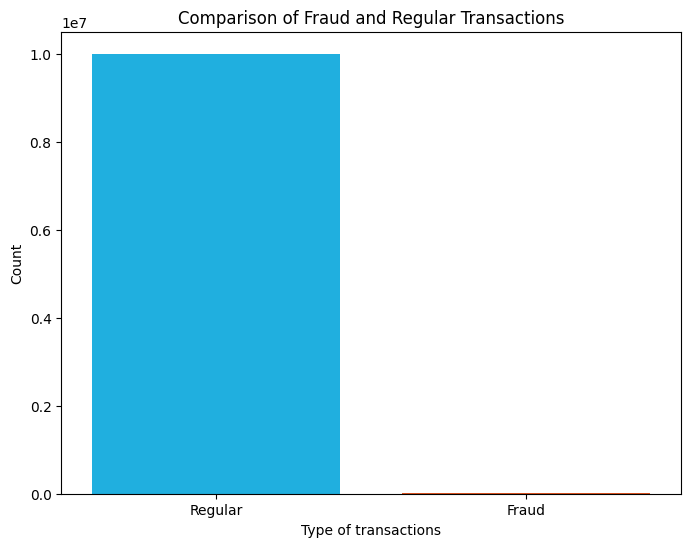

Regular payments: 10003769 99.88 %
Fraudulent payments: 12013 0.12 %


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_transactions2 = transactions1.loc[transactions1['Is_Fraud?'] == 'Yes']
nonfraud_transactions2 = transactions1.loc[transactions1['Is_Fraud?'] == 'No']

fraud_counts = fraud_transactions2['Is_Fraud?'].count()
regular_counts = nonfraud_transactions2['Is_Fraud?'].count()

plot_data = pd.DataFrame({
    'Type of transactions': ['Regular', 'Fraud'],
    'Count': [regular_counts, fraud_counts]
})

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=plot_data, x='Type of transactions', y='Count', palette=['deepskyblue', 'orangered'])
plt.title('Comparison of Fraud and Regular Transactions')
plt.xlabel('Type of transactions')
plt.ylabel('Count')
plt.show()

percentage = transactions1['Is_Fraud?'].value_counts(normalize=True).round(4) * 100
print("Regular payments:", nonfraud_transactions2['Is_Fraud?'].count(), percentage[0], '%')
print("Fraudulent payments:", fraud_transactions2['Is_Fraud?'].count(), percentage[1], '%')

Dataset's count difference between fraud, and regular transactions is too large, consequently fraud count gets lost in visualizations. To make data clearly visible in the visualizations instead of plotting raw counts, we will represent the normalized count of each category within the dataset. This allows us to compare the relative distribution of categories without being affected by the absolute count values.

### Amount

Most fraud transactions amount ranges from 0-200. After comparing statistics we notice that the average of regular transactions is 5.13\\$ and of fraud transactions is 123\\$. This confirms fraud transactions are generally larger amounts. In this particular dataset fraud transactions greater than 125\\$ take up 69.22% of all fraud cases.

From the plot we can see there are also negative amounts, we don't have data about the meaning of those, so we will remove those observations from the dataset altogether.

In [8]:
def amount_preprocessing(df):
    df['Amount'] = df['Amount'].apply(lambda value: value.split("$")[1])
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    return df

transactions1 = amount_preprocessing(transactions1)

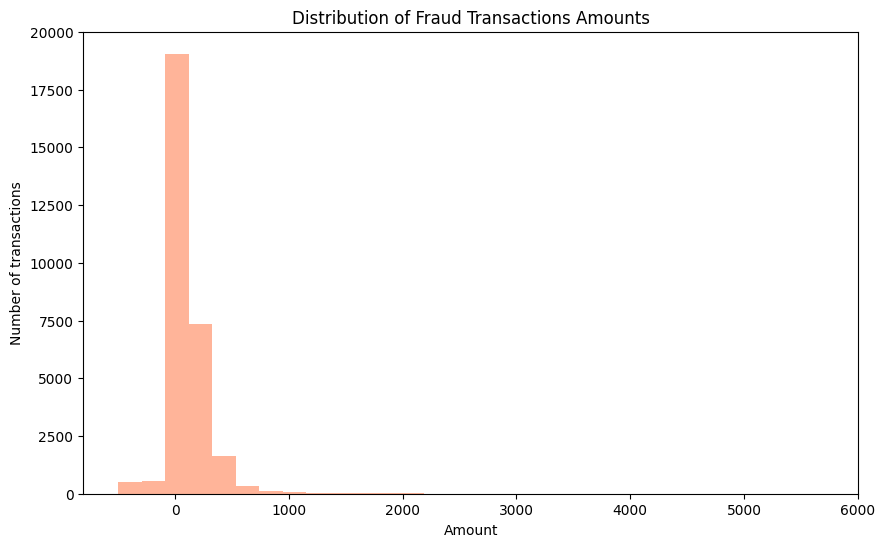

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_transactions2 = transactions1[transactions1['Is_Fraud?'] == 'Yes']

plt.figure(figsize=(10, 6))
sns.distplot(fraud_transactions2['Amount'], kde=False, color='orangered', bins=30)
plt.title('Distribution of Fraud Transactions Amounts')
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.show()

In [10]:
# Removing the negative amounts because we don't know what do they mean, this reduces the dataset with approximately 1 million obeservations
transactions1 = transactions1[transactions1['Amount'] >= 0]
transactions1.shape

(23142217, 15)

In [11]:
# Describe statistics for fraud and regular transactions

nonfraud_stats = transactions1[transactions1['Is_Fraud?'] == 'No']['Amount'].describe()

fraud_stats = transactions1[transactions1['Is_Fraud?'] == 'Yes']['Amount'].describe()

combined_stats = pd.concat([nonfraud_stats, fraud_stats], axis=1)
combined_stats.columns = ['Regular', 'Fraud']

print(combined_stats)

            Regular         Fraud
count  2.311358e+07  28632.000000
mean   5.137984e+01    123.920565
std    7.387820e+01    187.782527
min    0.000000e+00      0.000000
25%    1.144000e+01     23.757500
50%    3.310000e+01     75.445000
75%    6.793000e+01    154.412500
max    1.239050e+04   5694.440000


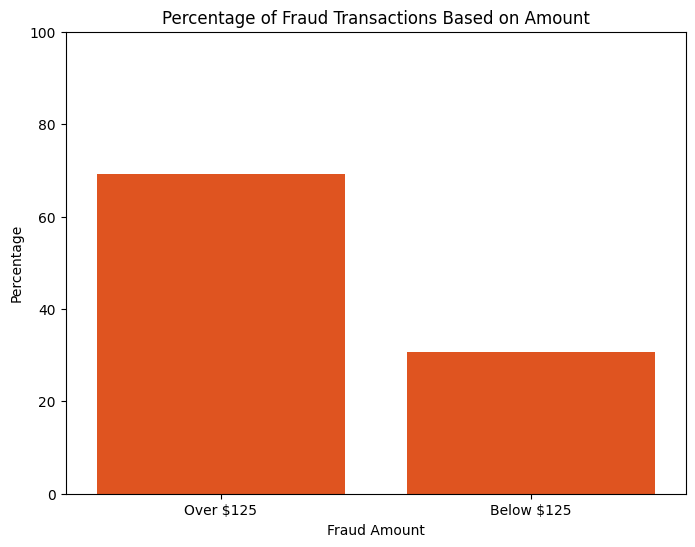

Percentage of fraud transactions greater than 125$: 69.22%
Percentage of fraud transactions smaller than 125$: 30.78%


In [20]:
amount2 = 125

fraud_smaller_amount2 = (fraud_transactions2['Amount'] < amount2).sum()
fraud_greater_amount2 = (fraud_transactions2['Amount'] > amount2).sum()
total_values2 = len(fraud_transactions2)

percentage_greater2 = (fraud_smaller_amount2 / total_values2) * 100
percentage_smaller2 = (fraud_greater_amount2  / total_values2) * 100

data = {
    'Fraud Amount': ['Over $125', 'Below $125'],
    'Percentage': [percentage_greater2, percentage_smaller2]
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Fraud Amount', y='Percentage', color='orangered')
plt.title('Percentage of Fraud Transactions Based on Amount')
plt.ylabel('Percentage')
plt.xlabel('Fraud Amount')
plt.ylim(0, 100) 
plt.show()

print(f"Percentage of fraud transactions greater than {amount2}$: {percentage_greater2:.2f}%")
print(f"Percentage of fraud transactions smaller than {amount2}$: {percentage_smaller2:.2f}%")

### Category

It's not necessary for the fraud transactions to be from the most frequent regular categories.

In [7]:
# Merchant codes to less categories
def mcc_to_category(df):
    mcc_mapping = {
        (1, 1499): 'agricultural',
        (1500, 2999): 'contracted',
        (3000, 3999): 'travel',
        (4000, 4799): 'transportation',
        (4800, 4999): 'utility',
        (5000, 5599): 'retail outlet',
        (5600, 5699): 'clothing',
        (5700, 7299): 'misc',
        (7300, 7999): 'business',
        (8000, 8999): 'professional',
        (9000, 9999): 'government'
    }

    def mcc_cat(value):
        for range_, replacement in mcc_mapping.items():
            if isinstance(range_, tuple) and range_[0] <= value <= range_[1]:
                return replacement
        return value

    df['Category'] = df['MCC'].apply(mcc_cat)
    df['Category'] = df['Category'].astype("category")
    return df

transactions1 = mcc_to_category(transactions1)

In [10]:
fraud_transactions2 = transactions1.loc[transactions1['Is_Fraud?'] == 'Yes']
nonfraud_transactions2 = transactions1.loc[transactions1['Is_Fraud?'] == 'No']

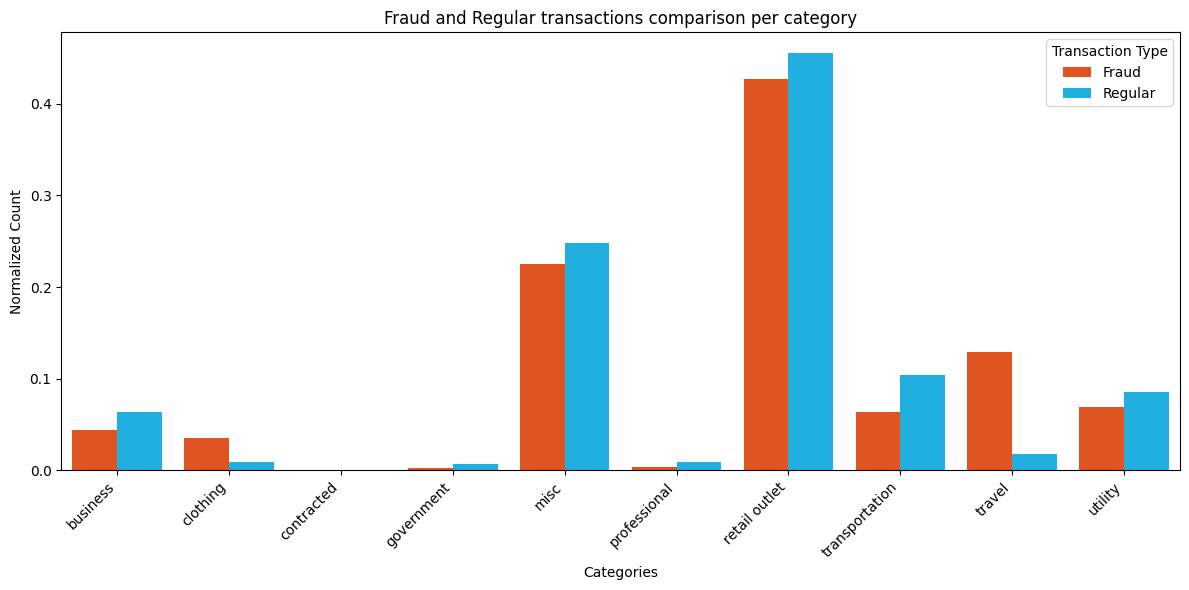

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare normalized representation of the categories
fraud_category2 = fraud_transactions2[['Category']].copy()
nonfraud_category2 = nonfraud_transactions2[['Category']].copy()

counts1 = fraud_category2['Category'].value_counts()
counts2 = nonfraud_category2['Category'].value_counts()

total1 = len(fraud_category2)
total2 = len(nonfraud_category2)
proportions1 = counts1 / total1
proportions2 = counts2 / total2

categories = sorted(set(proportions1.index) | set(proportions2.index))
indices = np.arange(len(categories))

fraud_proportions = [proportions1.get(category, 0) for category in categories]
regular_proportions = [proportions2.get(category, 0) for category in categories]

plot_data = pd.DataFrame({
    'Categories': categories * 2,
    'Normalized Count': fraud_proportions + regular_proportions,
    'Transaction Type': ['Fraud'] * len(categories) + ['Regular'] * len(categories)
})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='Categories', y='Normalized Count', hue='Transaction Type', palette=['orangered', 'deepskyblue'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Normalized Count')
plt.title('Fraud and Regular transactions comparison per category')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()


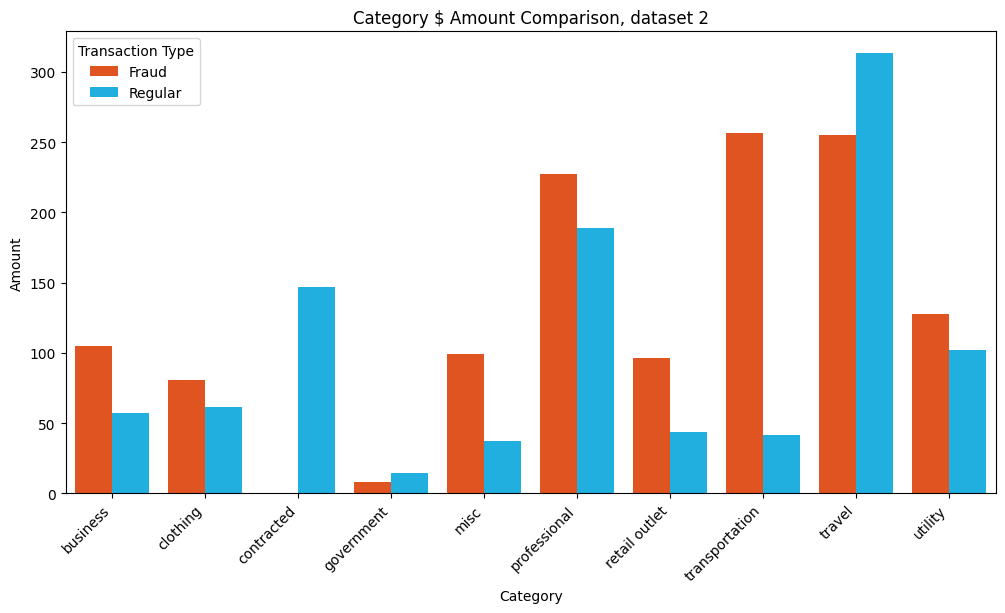

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_categories2a = fraud_transactions2.groupby('Category')['Amount'].mean().reset_index()
nonfraud_categories2a = nonfraud_transactions2.groupby('Category')['Amount'].mean().reset_index()

nonfraud_categories2a = nonfraud_categories2a.sort_values(by='Amount', ascending=False)
fraud_categories2a = fraud_categories2a.sort_values(by='Amount', ascending=False)

merged_data = pd.concat([fraud_categories2a.assign(Transaction_Type='Fraud'),
                         nonfraud_categories2a.assign(Transaction_Type='Regular')])
merged_data = merged_data.groupby(['Category', 'Transaction_Type']).mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='Category', y='Amount', hue='Transaction_Type', palette=['orangered', 'deepskyblue'])

plt.title('Category $ Amount Comparison, dataset 2')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.legend(title='Transaction Type')
plt.xticks(rotation=45, ha='right')

plt.show()


The data is sorted per descending Regular transactions, obviously the highest mean amount of regular transactions doesn't match the fraud ones per category. We can discard our hypothesis that fraudsters choose the category that people usually spend the most on. <br>

We'll explore a couple of customer's transaction history to spot patterns like:
- Do fraudsters in most cases make initial small payments for testing?
- Do the fraud payments usually occur during the night(non-working hours)?

In [24]:
#Function that prints random rows based on condition. 
#We'll use this to print 5 random customer numbers which we'll use for the data exploration.
def random_customers(dataframe, fraud_column, fraud_indicator, num_rows):
    filtered_data = dataframe[dataframe[fraud_column] == fraud_indicator]
    random_index = random.sample(range(len(filtered_data)), num_rows)
    random_customers = filtered_data.iloc[random_index]
    return random_customers

#Function that creates a dataframe with the whole transaction history of a customer. Will be used for visualization later.
def customer_transaction_history(dataframe, cc_num_column, customernumber):
    customer_transaction_history = dataframe[dataframe[cc_num_column] == customernumber]
    return customer_transaction_history

#Function to create a dataframe with only fraud transactions of a specific customer.
def customer_fraud(customer_transaction_history, fraud_column, fraud_indicator):
    customer_fraud = customer_transaction_history[customer_transaction_history[fraud_column] == fraud_indicator]
    return customer_fraud

#Creating the cc_num column based on User and Card
transactions1['cc_num'] = transactions1['User'].astype(str) + transactions1['Card'].astype(str)

#Creating the Date column
transactions1['Date'] = pd.to_datetime(transactions1[['Year', 'Month', 'Day']])

In [22]:
random_customers(transactions1, 'Is_Fraud?', 'Yes', 5)

,User,Card,Year,Month,Day,Time,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors?,Is_Fraud?,Category,cc_num
12466681,1024,1,2013,8,24,10:01,4.04,Swipe Transaction,7327645680395827094,Strasburg,OH,44680.0,5411,NaN,Yes,retail outlet,10241
1784346,142,1,2016,4,7,12:55,135.13,Online Transaction,6042526206085641250,ONLINE,NaN,NaN,5912,NaN,Yes,misc,1421
1729184,139,1,2010,5,4,13:11,89.78,Online Transaction,1913477460590765860,ONLINE,NaN,NaN,5300,NaN,Yes,retail outlet,1391
21557591,1760,2,2008,8,10,15:19,20.82,Online Transaction,7479593622964634169,ONLINE,NaN,NaN,5311,NaN,Yes,retail outlet,17602
5557900,478,0,2019,10,22,18:02,3.71,Chip Transaction,-727612092139916043,Rome,Italy,NaN,5411,NaN,Yes,retail outlet,4780


In [33]:
cust1 = customer_transaction_history(transactions1, 'cc_num', '10241')
cust1fraud = customer_fraud(cust1, 'Is_Fraud?' , 'Yes')

cust2 = customer_transaction_history(transactions1, 'cc_num', '1421')
cust2fraud = customer_fraud(cust2, 'Is_Fraud?' , 'Yes')

cust3 = customer_transaction_history(transactions1, 'cc_num', '1391')
cust3fraud = customer_fraud(cust3, 'Is_Fraud?' , 'Yes')

cust4 = customer_transaction_history(transactions1, 'cc_num', '17602')
cust4fraud = customer_fraud(cust4, 'Is_Fraud?' , 'Yes')

cust5 = customer_transaction_history(transactions1, 'cc_num', '4780')
cust5fraud = customer_fraud(cust5, 'Is_Fraud?' , 'Yes')

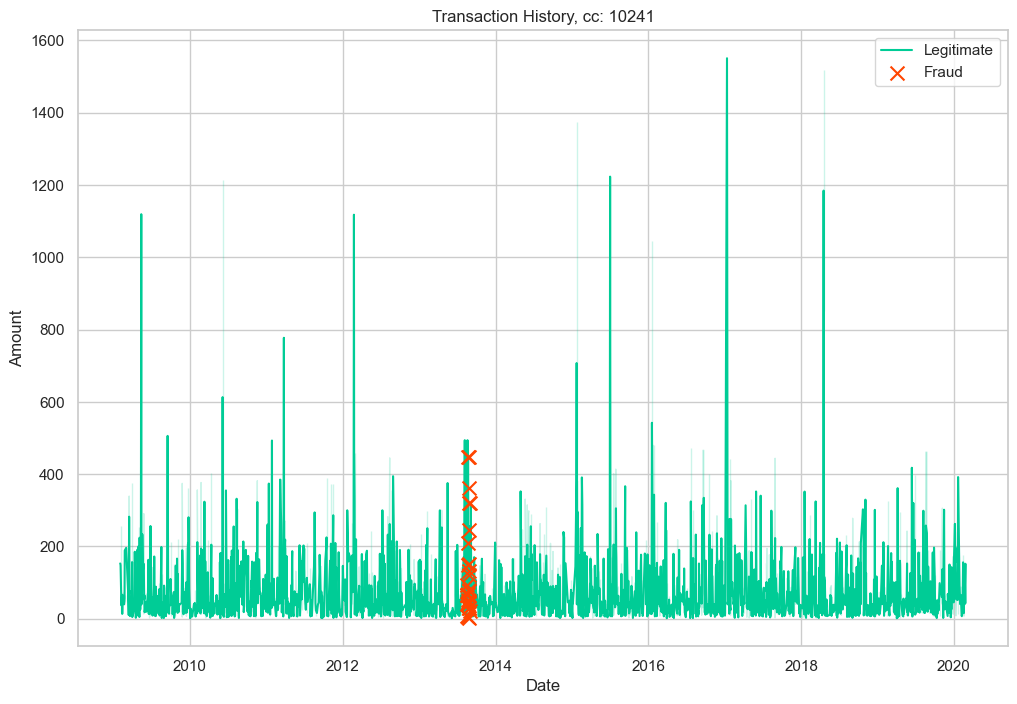

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.lineplot(data=cust1, x='Date', y='Amount', color='#00cc96', label='Legitimate')

plt.scatter(cust1fraud['Date'], cust1fraud['Amount'], color='orangered', label='Fraud', marker='x', s=100, zorder=3)

plt.title('Transaction History, cc: 10241')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

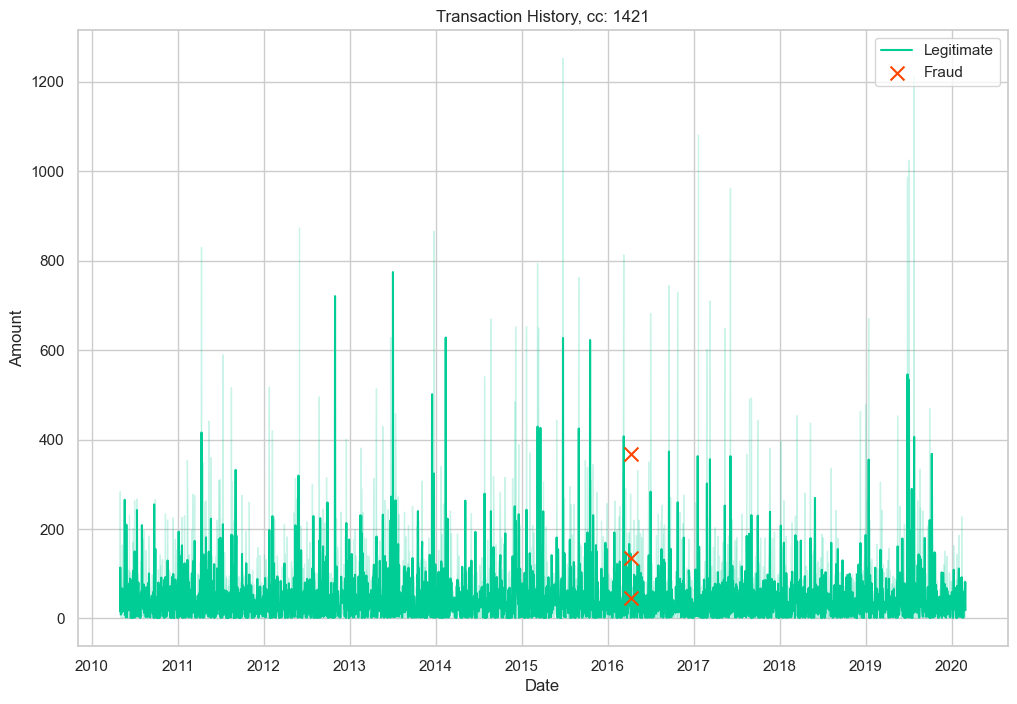

In [66]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=cust2, x='Date', y='Amount', color='#00cc96', label='Legitimate')
plt.scatter(cust2fraud['Date'], cust2fraud['Amount'], color='orangered', label='Fraud', marker='x', s=100, zorder=3)

plt.title('Transaction History, cc: 1421')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

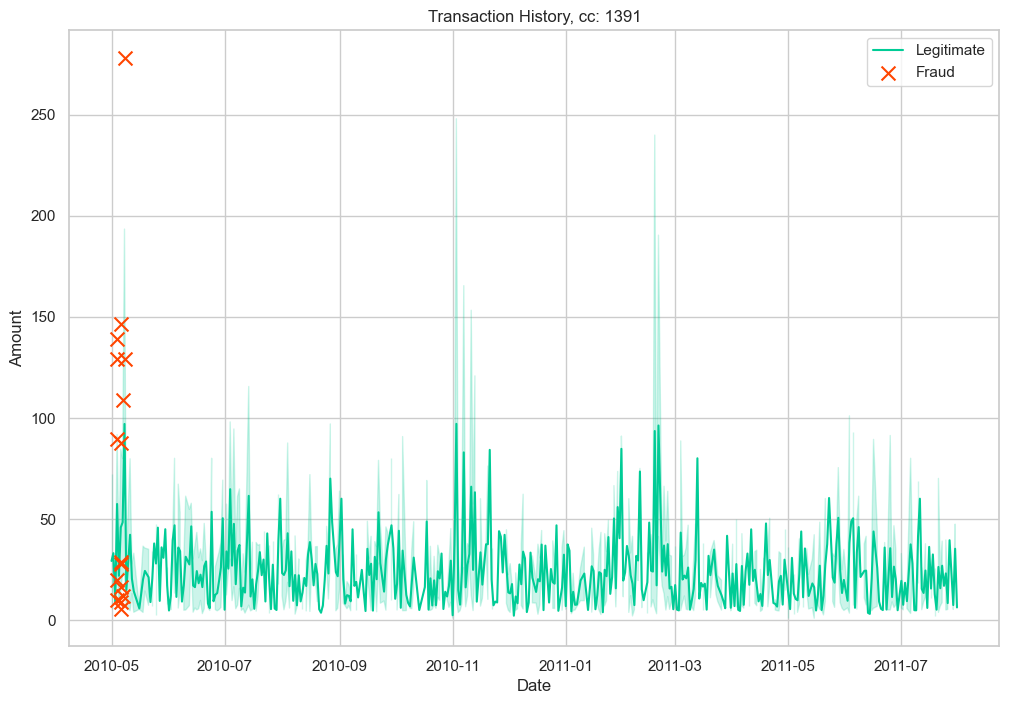

In [67]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=cust3, x='Date', y='Amount', color='#00cc96', label='Legitimate')
plt.scatter(cust3fraud['Date'], cust3fraud['Amount'], color='orangered', label='Fraud', marker='x', s=100, zorder=3)

plt.title('Transaction History, cc: 1391')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

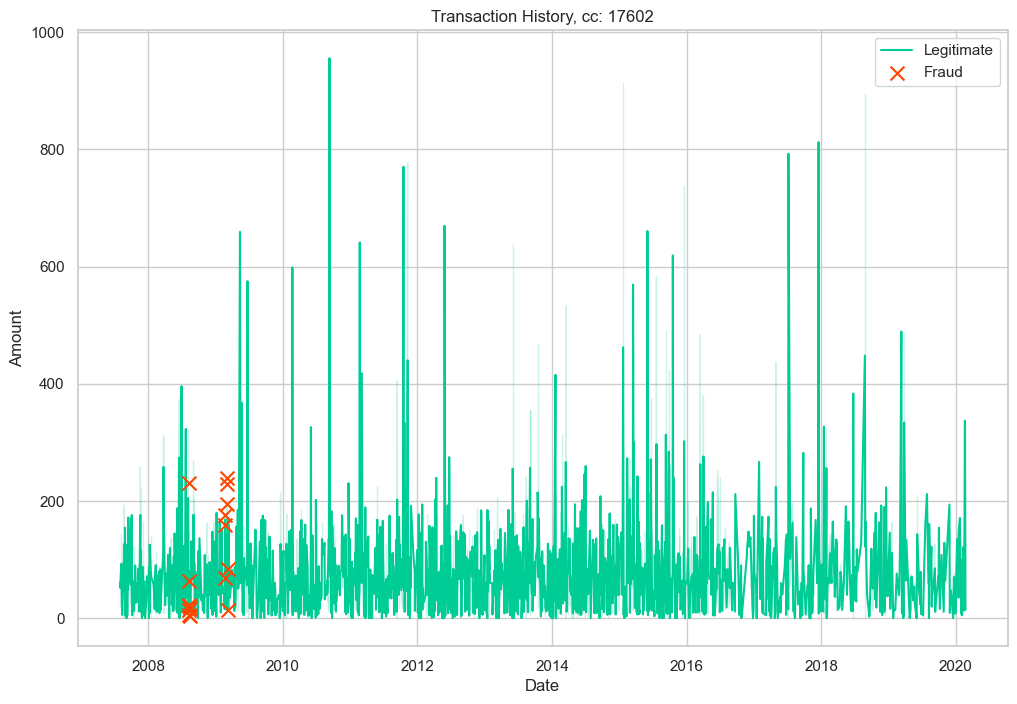

In [68]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=cust4, x='Date', y='Amount', color='#00cc96', label='Legitimate')
plt.scatter(cust4fraud['Date'], cust4fraud['Amount'], color='orangered', label='Fraud', marker='x', s=100, zorder=3)

plt.title('Transaction History, cc: 17602')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

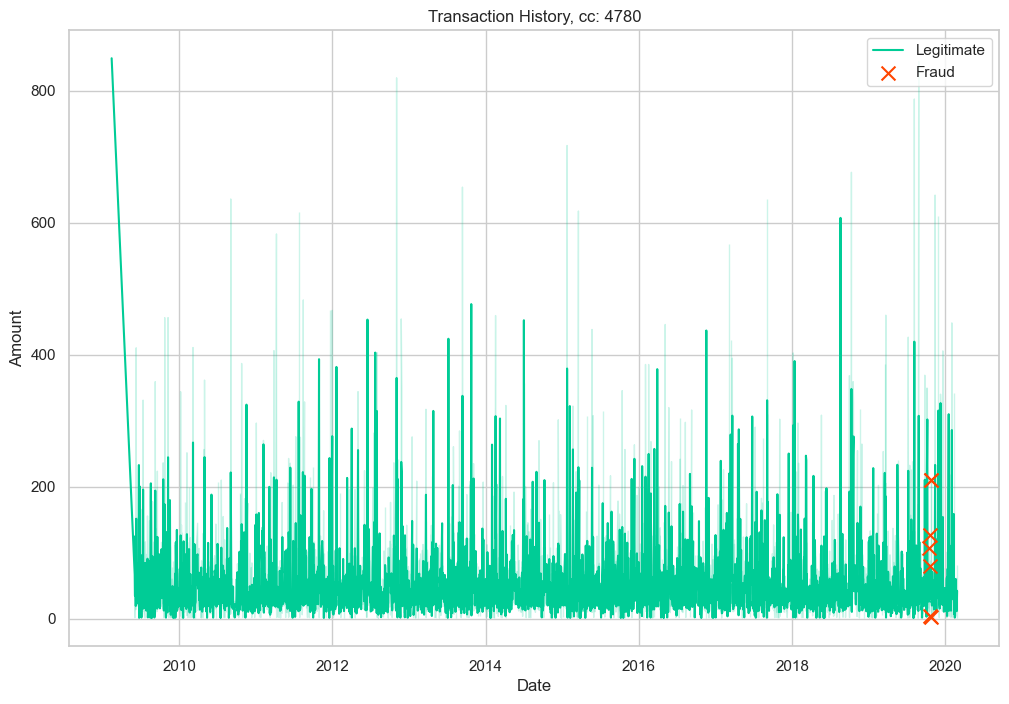

In [69]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=cust5, x='Date', y='Amount', color='#00cc96', label='Legitimate')
plt.scatter(cust5fraud['Date'], cust5fraud['Amount'], color='orangered', label='Fraud', marker='x', s=100, zorder=3)

plt.title('Transaction History, cc: 4780')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In all of the charts we see that there were low amount fraud transactions. Judging from these transaction histories the hypthesis that fraudsters choose smaller amounts for their first payments could be true.

Additionally we can conclude fraud transactions can be hard to spot just by the amount as they are similar to the regular spendings of the user.

#### Hour

Fraud occurs prevalently between 09:00 - 15:00. This is during the day, however below you'll see that in this dataset all the fraud transactions were made to countries outside USA, and mainly in Europe. Time difference between USA and Europe is approximately 6 hours. Which means for fraudsters in Europe it would be 15:00 - 21:00.

In [12]:
# Turns Time column into Hour and Minute, and TimeInMinutes (this was later dropped as it correlates with the Hour column)
def time_processing(df):
    df['TimeInMinutes'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['Time'], format='%H:%M').dt.minute
    df[['Hour', 'Minute']] = df['Time'].str.split(':', expand=True)
    df[['Hour', 'Minute']] = df[['Hour', 'Minute']].apply(pd.to_numeric)
    df = df.drop('Time', axis=1)
    return df

transactions1 = time_processing(transactions1)

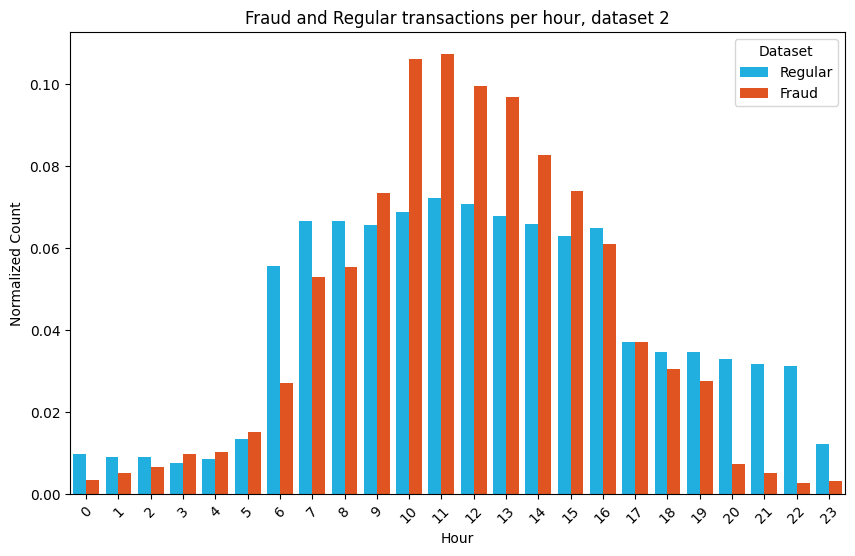

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_data = transactions1[transactions1['Is_Fraud?'] == 'Yes']
hourly_fraud_counts2 = fraud_data.groupby('Hour').size().reset_index(name='Count')
hourly_fraud_counts2 = hourly_fraud_counts2.sort_values('Count', ascending=False)
nonfraud_data = transactions1[transactions1['Is_Fraud?'] == 'No']
hourly_regular_counts2 = nonfraud_data.groupby('Hour').size().reset_index(name='Count')
hourly_regular_counts2 = hourly_regular_counts2.sort_values('Count', ascending=False)

proportionshh1 = hourly_fraud_counts2['Normalized Count'] = hourly_fraud_counts2['Count'] / hourly_fraud_counts2['Count'].sum()
proportionshh2 = hourly_regular_counts2['Normalized Count'] = hourly_regular_counts2['Count'] / hourly_regular_counts2['Count'].sum()

proportional_data_hours2 = pd.DataFrame({
    'Hour': proportionshh2.index.tolist() + proportionshh1.index.tolist(),
    'Dataset': ['Regular'] * len(proportionshh2) + ['Fraud'] * len(proportionshh1),
    'Proportion': proportionshh2.tolist() + proportionshh1.tolist()
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=proportional_data_hours2, x='Hour', y='Proportion', hue='Dataset', palette=['deepskyblue', 'orangered'])
plt.title('Fraud and Regular transactions per hour, dataset 2')
plt.xlabel('Hour')
plt.ylabel('Normalized Count')
plt.xticks(rotation=45)
plt.show()

#### Location

Most fraud transactions occured in Italy(first bar with name on the right represents Italy).

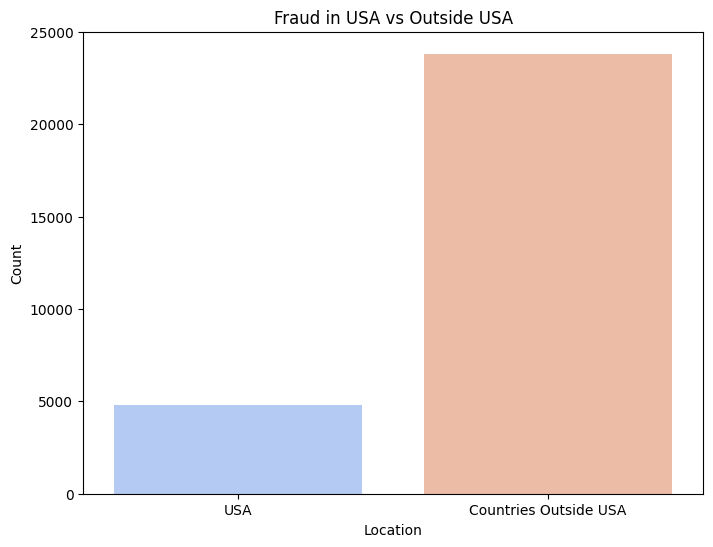

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a boolean mask to filter USA states
usa_states = transactions1['Merchant_State'].isin(['OH', 'PA', 'KY', 'NJ', 'CA', 'IL', 'NY', 'MI', 'FL', 'TX',
       'GA', 'CO', 'WI', 'TN', 'VT', 'MD', 'AL', 'IN', 'IA', 'AZ', 'WA',
       'AR', 'NC', 'MA', 'NV', 'MN', 'NE', 'HI', 'SC', 'ID', 'MS', 'KS',
       'LA', 'MO', 'DE', 'VA', 'CT', 'NM', 'OK', 'OR', 'MT',
       'ME', 'NH', 'UT', 'RI', 'WV', 'SD', 'DC', 'ND', 'AK', 'WY', 'AA'])

non_usa = ~usa_states

usa_count = transactions1.loc[usa_states & (transactions1['Is_Fraud?'] == 'Yes'), 'Is_Fraud?'].count()
nonusa_count = transactions1.loc[non_usa & (transactions1['Is_Fraud?'] == 'Yes'), 'Is_Fraud?'].count()

data = {
    'Location': ['USA', 'Countries Outside USA'],
    'Count': [usa_count, nonusa_count]
}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Location', y='Count', palette='coolwarm')
plt.title('Fraud in USA vs Outside USA')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

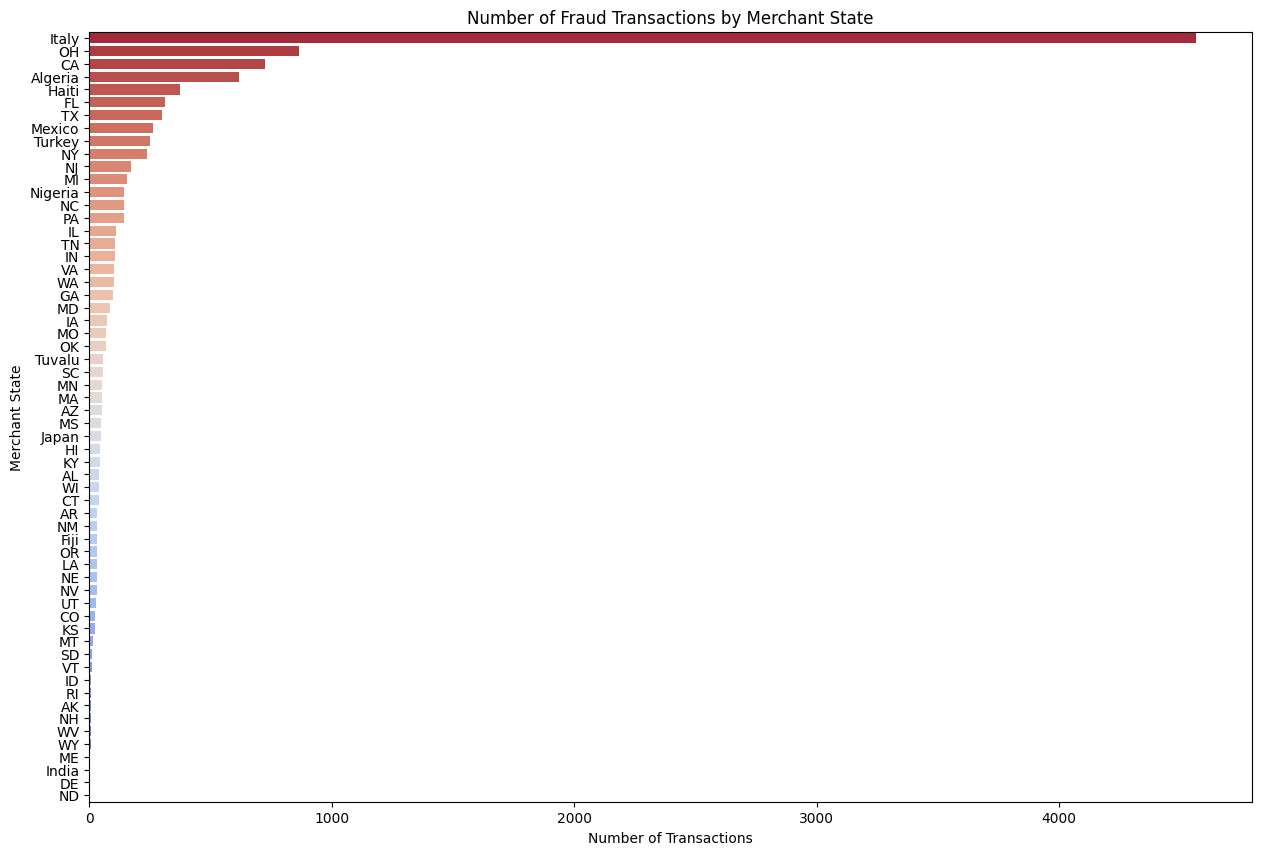

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud = transactions1[transactions1['Is_Fraud?'] == 'Yes']

state_counts = fraud['Merchant_State'].value_counts().reset_index()
state_counts.columns = ['Merchant_State', 'Count']

plt.figure(figsize=(15, 10))
sns.barplot(data=state_counts, x='Count', y='Merchant_State', palette='coolwarm_r') 
plt.title('Number of Fraud Transactions by Merchant State')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant State')
plt.show()

#### Average Daily Transactions per User

We'll compare if on days that fraud occurs the daily transactions count increases. It seems that's not the case, and actually the transactions are slightly less when fraud occurs(~ 0.5 less).

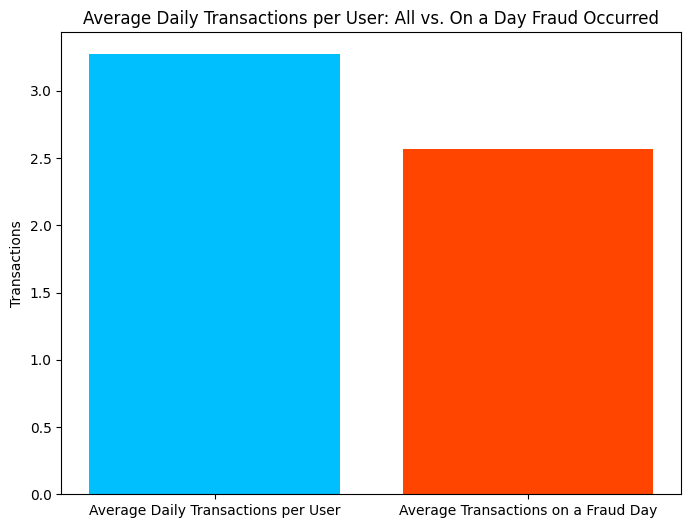

In [45]:
#Creating the AverageDailyTransactions and AverageDailyFraudTransactions columns to plot comparison
transactions1['Date'] = pd.to_datetime(transactions1[['Year', 'Month', 'Day']])

daily_transactions = transactions1.groupby(['User', 'Date']).size().reset_index(name='Transactions')
average_daily_transactions = daily_transactions.groupby('User')['Transactions'].mean().reset_index(name='AverageDailyTransactions')

fraud_transactions = transactions1[transactions1['Is_Fraud?'] == 'Yes'].groupby(['User', 'Date']).size().reset_index(name='FraudTransactions')
average_fraud_transactions = fraud_transactions.groupby('User')['FraudTransactions'].mean().reset_index(name='AverageDailyFraudTransactions')

comparison_df = pd.merge(average_daily_transactions, average_fraud_transactions, on='User')

avg_daily = comparison_df['AverageDailyTransactions'].mean()
avg_fraud = comparison_df['AverageDailyFraudTransactions'].mean()

averages = [avg_daily, avg_fraud]
labels = ['Average Daily Transactions per User', 'Average Transactions on a Fraud Day']

plt.figure(figsize=(8, 6))
plt.bar(labels, averages, color=['deepskyblue', 'orangered'])
plt.title('Average Daily Transactions per User: All vs. On a Day Fraud Occurred')
plt.ylabel('Transactions')
plt.show()

#### Error Type

Bad CVV and Bad PIN errors occur way more often during fraud transactions than regular ones.

In [5]:
# Custom encoder class for Errors? column as it has variety of error types separated by commas in each row
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer

class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()
        self.classes_ = None 
        
    def fit(self, X, y=None):
        X = X.iloc[:, 0].fillna('')  # Convert NaN values to empty string
        self.mlb.fit(X.apply(lambda x: x.split(',') if x else []))
        # Exclude the empty string class if present
        self.classes_ = [cls for cls in self.mlb.classes_ if cls != '']
        return self
    
    def transform(self, X, y=None):
        X = X.iloc[:, 0].fillna('')  # Handle NaNs
        transformed = self.mlb.transform(X.apply(lambda x: x.split(',') if x else []))
        df_transformed = pd.DataFrame(transformed, columns=self.mlb.classes_)
        if '' in self.classes_:
            df_transformed.drop('', axis=1, inplace=True)
        return df_transformed
    
    def get_feature_names_out(self, input_features=None):
        return self.classes_

mlb_transformer = MultiLabelBinarizerTransformer()

columns_to_transform = ['Errors?']  
transformed_data = mlb_transformer.fit_transform(transactions1[columns_to_transform])

transactions1 = pd.concat([transactions1, transformed_data], axis=1)

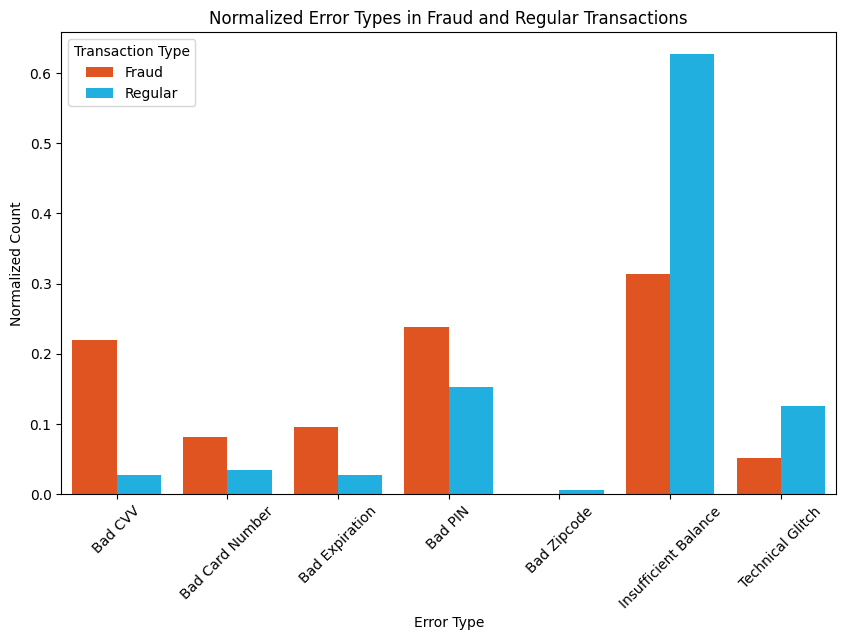

In [16]:
import seaborn as sns

fraud_data = transactions1[transactions1['Is_Fraud?'] == 'Yes']
nonfraud_data = transactions1[transactions1['Is_Fraud?'] == 'No']

fraud_error_counts = fraud_data[['Bad CVV', 'Bad Card Number', 'Bad Expiration', 'Bad PIN', 'Bad Zipcode', 'Insufficient Balance', 'Technical Glitch']].sum().reset_index()
fraud_error_counts.columns = ['Error_Type', 'Count']
fraud_error_counts['Is_Fraud?'] = 'Fraud'

nonfraud_error_counts = nonfraud_data[['Bad CVV', 'Bad Card Number', 'Bad Expiration', 'Bad PIN', 'Bad Zipcode', 'Insufficient Balance', 'Technical Glitch']].sum().reset_index()
nonfraud_error_counts.columns = ['Error_Type', 'Count']
nonfraud_error_counts['Is_Fraud?'] = 'Regular'

error_counts = pd.concat([fraud_error_counts, nonfraud_error_counts])

total_counts_by_fraud_status = error_counts.groupby('Is_Fraud?')['Count'].transform('sum')
error_counts['Normalized_Count'] = error_counts['Count'] / total_counts_by_fraud_status

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=error_counts, x='Error_Type', y='Normalized_Count', hue='Is_Fraud?', palette=['orangered', 'deepskyblue'])
plt.title('Normalized Error Types in Fraud and Regular Transactions')
plt.xlabel('Error Type')
plt.ylabel('Normalized Count')
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.show()

#### Day of Week

Seems Sunday, Thursday and Friday are prevalent for fraud transactions.

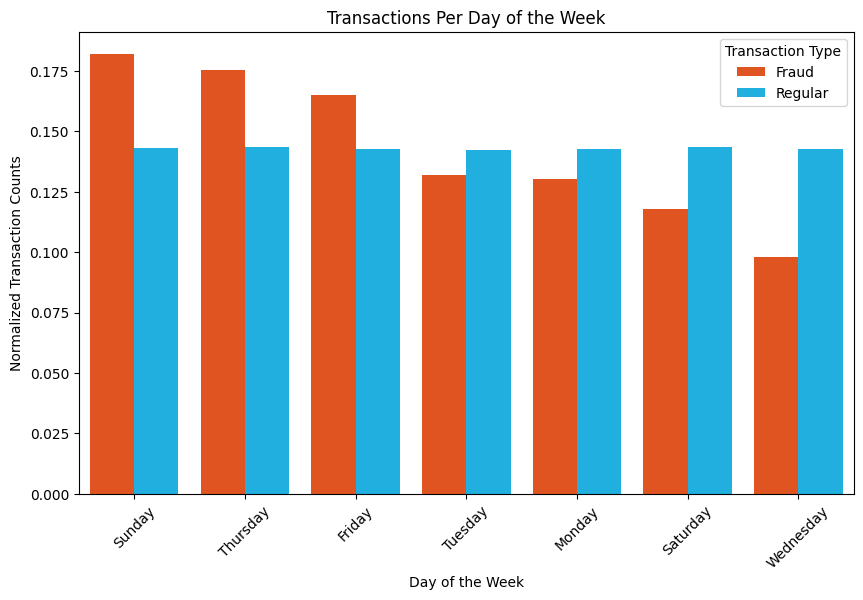

In [54]:
import seaborn as sns

transactions1['Date'] = pd.to_datetime(transactions1[['Year', 'Month', 'Day']])
transactions1['DayOfWeek'] = transactions1['Date'].dt.day_name()

daily_counts = transactions1.groupby(['DayOfWeek', 'Is_Fraud?']).size().reset_index(name='Count')

hourly_fraud_counts = daily_counts[daily_counts['Is_Fraud?'] == 'Yes']
hourly_regular_counts = daily_counts[daily_counts['Is_Fraud?'] == 'No']

hourly_fraud_counts['Normalized Count'] = hourly_fraud_counts['Count'] / hourly_fraud_counts['Count'].sum()
hourly_regular_counts['Normalized Count'] = hourly_regular_counts['Count'] / hourly_regular_counts['Count'].sum()

sorted_fraud_counts = hourly_fraud_counts.sort_values('Normalized Count', ascending=False)

sorted_fraud_counts['Is_Fraud?'] = sorted_fraud_counts['Is_Fraud?'].replace({'Yes': 'Fraud', 'No': 'Regular'})
hourly_regular_counts['Is_Fraud?'] = hourly_regular_counts['Is_Fraud?'].replace({'Yes': 'Fraud', 'No': 'Regular'})

plot_data = pd.concat([sorted_fraud_counts, hourly_regular_counts])

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='DayOfWeek', y='Normalized Count', hue='Is_Fraud?', palette=['orangered', 'deepskyblue'])
plt.title('Transactions Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Normalized Transaction Counts')
plt.legend(title='Transaction Type')
plt.xticks(rotation=45)
plt.show()

#### Use Chip

Regular transaction's Use chip types usage is similar, however Fraud transactions occur mostly within Online transactions.

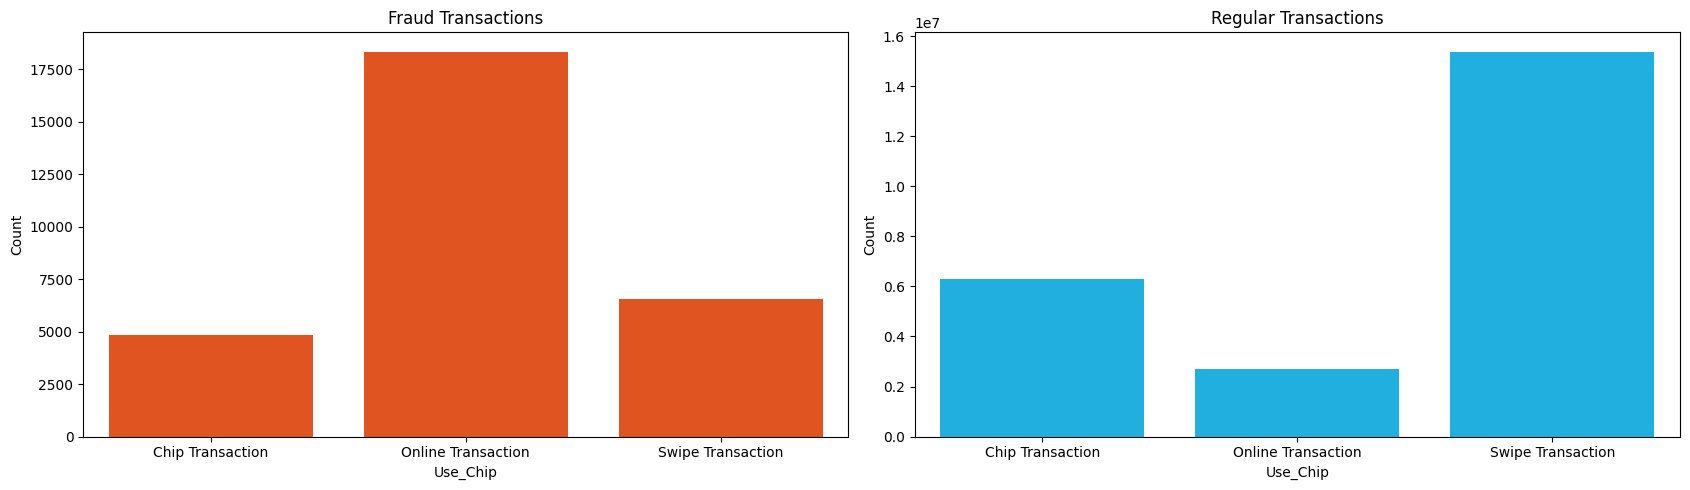

In [74]:
def usechip_plot(df):
    chip_counts = df.groupby(['Use_Chip', 'Is_Fraud?']).size().reset_index(name='Count')

    chip_counts['Is_Fraud?'] = chip_counts['Is_Fraud?'].replace({'Yes': 'Fraud', 'No': 'Regular'})

    return chip_counts

plot_data = usechip_plot(transactions1)

fig, axes = plt.subplots(1, 2, figsize=(17, 5))

sns.barplot(data=plot_data[plot_data['Is_Fraud?'] == 'Fraud'], x='Use_Chip', y='Count', ax=axes[0], color='orangered')
axes[0].set_title('Fraud Transactions')

sns.barplot(data=plot_data[plot_data['Is_Fraud?'] == 'Regular'], x='Use_Chip', y='Count', ax=axes[1], color='deepskyblue')
axes[1].set_title('Regular Transactions')

plt.tight_layout()
plt.show()

#### Correlations

Reviewing if there are any correlations as that would indicate redundant data which can be dropped.
There are no correlated features so far.

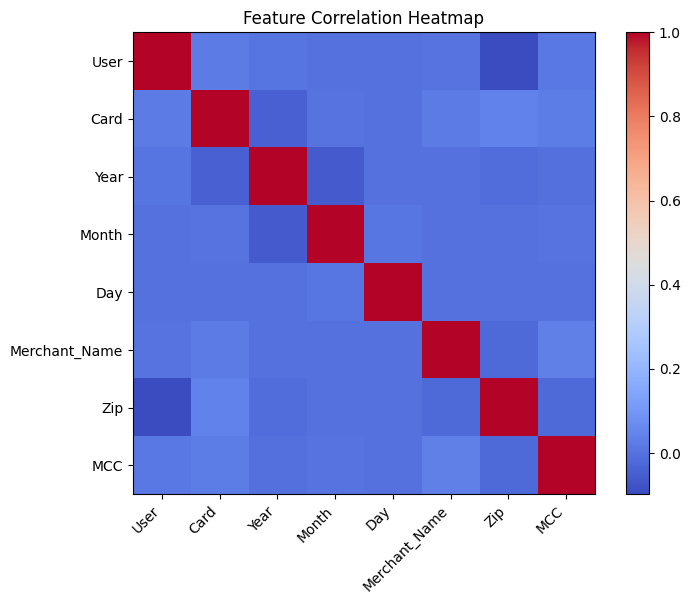

In [17]:
correlation_matrix = transactions1.select_dtypes(include=['number'])

correlation_matrix = correlation_matrix.corr(method='spearman') #chose Spearman method because data is not linear

# Plotting
plt.figure(figsize=(8, 6)) 
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)
plt.title('Feature Correlation Heatmap')
plt.show()

# Data Preprocessing

These are the basic preprocessing steps that turn all the features into numericals. Additionally there is some feature engineering that can support the process based on the Data exploration. Feature selection also supports the models performance.

### Feature Selection


In real-life data problems, it's almost rare that all the variables in the dataset are useful for building a model. Adding redundant variables reduces the model's generalization capability and may also reduce the overall accuracy of a classifier. Here are some [Feature Selection Techniques](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/#:~:text=In%20real%2Dlife%20data%20science,overall%20accuracy%20of%20a%20classifier.)

I experimented training the models with different features, however couldn't achieve good results on the validation sets. Most of the models were overfitting, and this caused high variance. The features used during the training of each model are shared in the cells below.

I also extracted Feature Importances from a Random Forest model trained on all the possible features, the results are shared later in the Modeling section.

### Feature Engineering

The new features in the dataset, some of them were used for Data Exploration and some for model training.

- __Category__ - Mapping MCC (merchant code) that can have 9999 unique values to way less categories as there is correlation between most <br>
- __Hour and Minute__ - Separated Hour <br>
- __LAT and LNG__ - Representing the Zip of Merchant <br>
- __AvgDailyTransactionsPerCard, AvgDailyTransactions__ - feature engineering these columns for support, we could make columns related to only the Fraud transactions but that could leak data into the validation and test sets.
- __Ordinal date__ - Ordinal representation of the date
- __DayOfWeek__ - Represents the day of week the transaction happened

### Categorical encoding methods

We have quite a lot of unique categoricals in this dataset like Cities, Countries, States, Merchant Names, Merchant Categories(MCC) etc. Depending on the models we'll use we need to encode them in different manners. Generally not all of the categoricals need to be encoded, some of them can also be dropped if they correlate between each other.

This [research paper](https://arxiv.org/pdf/2112.12024.pdf) reviews a vast amount of methods, and provides extensive information about compatibility of each method with algorithms.

### Our models
The models we experiment with in this project are:
 - __LightGBM__ -  This is a the reason is LGBM has a builtin method to process categorical features. The method behind the model is explained [here](https://lightgbm.readthedocs.io/en/latest/Features.html#optimal-split-for-categorical-features). You don't need to use OneHotEncoding, or any other type of encoding, you will only have to set the data type to categorical.
 - __LogisticRegression__ - A classic model that is also used in fraud detection.
 - __RandomForest__ - Numerous comparative studies have proven RF’s effectiveness in fraud detection relative to machine learning solutions and other models. The results of [this research](https://www.mdpi.com/2076-3417/13/9/5758) show that an RF-based model outperforms a support vector, machine learning algorithms, and even a neural network in terms of AP, AUC, and PrecisonRank metrics (all of the models made predictions on an actual transaction data from a Belgian payment provider).

In [6]:
from sklearn.preprocessing import StandardScaler

# Turns Time column into Hour and Minute, and TimeInMinutes (this was later dropped as it correlates with the Hour column)
def time_processing(df):
    df['TimeInMinutes'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['Time'], format='%H:%M').dt.minute
    df[['Hour', 'Minute']] = df['Time'].str.split(':', expand=True)
    df[['Hour', 'Minute']] = df[['Hour', 'Minute']].apply(pd.to_numeric)
    df = df.drop('Time', axis=1)
    return df


# Turns amount into numerical and scales
def amount_preprocessing(df):
    df['Amount'] = df['Amount'].apply(lambda value: value.split("$")[1])
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    
    #Scale the Amount column
    scaler = StandardScaler()
    df['Amount'] = scaler.fit_transform(df[['Amount']])
    return df

# Merchant codes to less categories
def mcc_to_category(df):
    mcc_mapping = {
        (1, 1499): 'agricultural',
        (1500, 2999): 'contracted',
        (3000, 3999): 'travel',
        (4000, 4799): 'transportation',
        (4800, 4999): 'utility',
        (5000, 5599): 'retail outlet',
        (5600, 5699): 'clothing',
        (5700, 7299): 'misc',
        (7300, 7999): 'business',
        (8000, 8999): 'professional',
        (9000, 9999): 'government'
    }

    def mcc_cat(value):
        for range_, replacement in mcc_mapping.items():
            if isinstance(range_, tuple) and range_[0] <= value <= range_[1]:
                return replacement
        return value

    df['Category'] = df['MCC'].apply(mcc_cat)
    df['Category'] = df['Category'].astype("category")
    return df

# Get_dummies encoding of Errors? and Use_Chip
def ttype_error_dummies(df):
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a Pandas DataFrame.")
    
    errors_dummies = df['Errors?'].str.get_dummies(',').add_prefix('Error_')
    use_chip_dummies = pd.get_dummies(df['Use Chip'], prefix='Transaction_Type').astype(int)
    
    df = pd.concat([df, use_chip_dummies, errors_dummies], axis=1)
    df = df.drop(columns=['Use_Chip', 'Errors?'])
    return df

# Turns fraud indicator into numerical
def fraud_numeric(df):
    df['Is_Fraud?'] = df['Is_Fraud?'].replace({'No': 0, 'Yes': 1})
    return df

# Adds day of week column
def dayofweek(df):
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    df['DayOfWeek'] = df['Date'].dt.day_name()
    df = df.drop('Date', axis=1)
    return df

# Zip code to Latitude and Longtitude columns
def zip_to_latlng(df):
    usa_zips = pd.read_csv("https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data", delimiter=',')
    usa_zips.rename(columns={'ZIP': 'Zip'}, inplace=True)
    df = pd.merge(df, usa_zips, on='Zip', how='left')
    columns_to_fill = ['Zip','LAT','LNG']
    fill_nans = {'Zip': 13440.0, 'LAT': 43.215771, 'LNG': -75.461779} #Replacing Nan's with one of the least frequent Zip codes in the dataset
    df[columns_to_fill] = df[columns_to_fill].fillna(value=fill_nans)
    df = df.drop('Zip', axis=1)
    return df


# Adds new columns AvgDailyTransactions and AvgDailyTransactionsPerCard
def pre_feature_engineering(df):
    #Creating temporary Date column for the purpose
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    #Average Daily Transactions Count per User
    transactions_per_day = df.groupby(['User', 'Date']).size().reset_index(name='TransactionCount')
    avg_daily_transactions = transactions_per_day.groupby('User')['TransactionCount'].mean().reset_index(name='AvgDailyTransactions')
    df = pd.merge(df, avg_daily_transactions, on='User', how='left')
    
    #Average Daily Transactions Count per Card
    transactions_per_card = df.groupby(['User', 'Card', 'Date']).size().reset_index(name='TransactionCount')
    avg_daily_transactions_per_card = transactions_per_card.groupby(['User', 'Card'])['TransactionCount'].mean().reset_index(name='AvgDailyTransactionsPerCard')
    df = pd.merge(df, avg_daily_transactions_per_card, on=['User', 'Card'], how='left')

    #Removing these as they will cause data leakage into the test dataset
    
    # Average Transaction Amount excl. fraud transactions
    #avg_transaction_amount = df[df['Is Fraud?'] != 1].groupby('User')['Amount'].mean().round(2).reset_index(name='AvgTransactionAmount')
    #df = pd.merge(df, avg_transaction_amount, on=['User'], how='left')

    # Average Daily Transaction Amount per User excl. fraud transactions
    #daily_transactions = df[df['Is Fraud?'] != 1].groupby(['User', 'Date'])['Amount'].mean().round(2).reset_index(name='DailyTransactionAmount')
    #avg_daily_transaction_per_user = daily_transactions.groupby('User')['DailyTransactionAmount'].mean().reset_index(name='AvgDailyTransactionAmount')
    #df = pd.merge(df, avg_daily_transaction_per_user, on='User', how='left')
    
    #Drop the Date column
    df = df.drop('Date', axis=1)
    return df

# Ordinal representation of the data
def rank_date(df):
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    df.sort_values(by=['User', 'Card', 'Date'], inplace=True)
    df['Ordinal_date'] = df.groupby(['User', 'Card'])['Date'].rank(method='dense').astype(int)
    df = df.drop('Date', axis=1)
    
    return df

# Feature selection function, it gets modified
def drop_columns(df):
    columns_to_drop = ['Merchant_City', 'MCC', 'Minute', 'Merchant_State', 'User', 'Card', 'Month', 'Day', 'Merchant_Name', 'TimeInMinutes', 'LAT', 'LNG', 'AvgDailyTransactionsPerCard', 'AvgDailyTransactions', 'Ordinal_date', 'Year', 'Category']
    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
    return df

def drop_columns_wfraud(df):
    columns_to_drop = ['Merchant_City', 'MCC', 'Minute', 'Is_Fraud?']
    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
    return df

# Custom encoder class for Errors? column as it has variety of error types separated by commas in each row
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer

class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()
        self.classes_ = None 
        
    def fit(self, X, y=None):
        X = X.iloc[:, 0].fillna('')  # Convert NaN values to empty string
        self.mlb.fit(X.apply(lambda x: x.split(',') if x else []))
        # Exclude the empty string class if present
        self.classes_ = [cls for cls in self.mlb.classes_ if cls != '']
        return self
    
    def transform(self, X, y=None):
        X = X.iloc[:, 0].fillna('')  # Handle NaNs
        transformed = self.mlb.transform(X.apply(lambda x: x.split(',') if x else []))
        df_transformed = pd.DataFrame(transformed, columns=self.mlb.classes_)
        if '' in self.classes_:
            df_transformed.drop('', axis=1, inplace=True)
        return df_transformed
    
    def get_feature_names_out(self, input_features=None):
        return self.classes_


In [21]:
# General pipelines, they might be slightly modified based on the models we experiment with

# We use this pipeline before the train/test split to ensure there is no data leakage
preprocessing_whole_dataset = Pipeline([
    ('amount_processing', FunctionTransformer(amount_preprocessing, validate=False)), # turns amount into numerical
    ('fraud_numeric', FunctionTransformer(fraud_numeric, validate=False)), # turns fraud indicator into numerical
    ('mcc_to_category', FunctionTransformer(mcc_to_category, validate=False)), # merchant codes to less categories
    ('time_processing', FunctionTransformer(time_processing, validate=False)), # creates TimeInMinutes and hour column
    ('zip_to_latlng', FunctionTransformer(zip_to_latlng, validate=False)), # zip code to latitude and longtitude columns
    ('add_dayofweek', FunctionTransformer(dayofweek, validate=False)) #adds day of week column
] 
)

# OneHotEncoder or BinaryEncoder pipeline - experimented with both
columns_to_encode_v1 = ['Use_Chip', 'DayOfWeek']
numerical_columns = ['User', 'Card', 'Year', 'Month', 'Day', 'Amount',
       'Merchant_Name', 'MCC',
       'Is_Fraud?', 'TimeInMinutes', 'Hour', 'Minute', 'LAT',
       'LNG', 'AvgDailyTransactions', 'AvgDailyTransactionsPerCard']

from category_encoders import BinaryEncoder

string_encoding = ColumnTransformer(
    transformers=[
        ('errors', MultiLabelBinarizerTransformer(), ['Errors?']),
        ('binary', BinaryEncoder(cols=columns_to_encode_v1), columns_to_encode_v1)
        #('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), columns_to_encode_v1)
    ],
    remainder='passthrough'  # This includes any columns not specified in the transformers
)

# This pipeline is used when you want to transform the categoricals with OneHotEncoding/BinaryEncoder
preprocessing_split_encoding = Pipeline([
    ('pre_feature_engineering', FunctionTransformer(pre_feature_engineering, validate=False)), #Adds new features
    ('rank_date', FunctionTransformer(rank_date, validate=False)), #Ordinal representation of the data
    ('drop_columns', FunctionTransformer(drop_columns, validate=False)), #Drops columns
    ('string_encoding', string_encoding)
        ] 
)

# Evaluation metrics

__Confusion matrix/Classification report__ provides the exact number of Predicted Negative/Positive, and Actual Negative/Positive classes.
|                 | Predicted Negative | Predicted Positive |
|-----------------|--------------------|--------------------|
| Actual Negative | True Negative (TN) | False Positive (FP)|
| Actual Positive | False Negative (FN)| True Positive (TP) |

Based on them we calculate the precision, recall, f1, and accuracy scores, as broken down below. Depending on the classification problem we're dealing with, and the data available, different scores would be relevant. <br> 
 
 - __Accuracy__ - Accuracy is the ratio of correctly predicted observations to the total observations. It provides an overall measure of how well the model is performing. [accuracy = np.sum([TP, TN]) / np.sum([TP, TN, FP, FN])]<br>
 - __Precision__ - Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of how many of the predicted positive instances are actually positive. [precision = TP / np.sum([TP, FP])]<br>
 - __Recall__ - Recall is the ratio of correctly predicted positive observations to the total actual positives. It is a measure of how many actual positive instances were captured by the model. [recall = TP / np.sum([TP, FN])]<br>
 - __F1 or beta__ - the F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, this is the default F-score. We can use F-beta and emphasize either precision or recall more, depending on the value of the beta parameter.
 
 __F<mi>&#x3B2;</mi> score__ <br>
Banks need to balance between providing a seamless transaction experience to their customers, but also security when there is a threat for a fraudulent usage of their funds. This means the models we aim for need to be able to detect fraudulent transactions, but also not misclassify non-fraudulent transactions. We need to set a model evaluation metric that will portray that. A metric we can use is F<mi>&#x3B2;</mi> (F-beta) which helps us define quantitatively the importance we put on fraud detection compared to non-fraud detection. This is possible by modifying the weight of the recall. Recall, together with precision are other standard scores used in model evaluation.

 - Precision is a metric that tells us about the quality of positive(fraud) predictions. Out of all the transactions predicted to be fraudulent, how many are actually fraudulent?
 - Recall tells us how well the model identifies true positives: Out of all the fraudulent transactions, how many were correctly identified?

The formula for F<mi>&#x3B2;</mi> score is: <br>
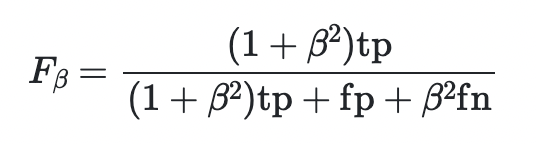
<br>Where __tp__ is the number of true positives, __fp__ is the number of false positives, and __fn__ is the number of false negatives. The __<mi>&#x3B2;</mi>__ parameter determines the weight of recall in the combined score.

The <mi>&#x3B2;</mi> parameter represents the ratio of recall importance to precision importance. beta > 1 gives more weight to recall, while beta < 1 favors precision. For example, beta = 2 makes recall twice as important as precision, while beta = 0.5 does the opposite. Asymptotically, beta -> +inf considers only recall, and beta -> 0 only precision.

_How do we set this ratio?_

What's most important for our model is to be able to flag the fraudulent transactions, so increasing the recall importance makes more sense. Yes, it is possible to misclassify regular transactions, however we can implement other solutions that help tackle this issue like a 2nd stage decision tree approach:
- Before a transaction is declined it goes through a stage where it's evaluated by certain criteria like: _Is it an unusually large transaction? Is it made at unusual times? Is it outside of the usual location? Does the user have large number of declines?_ etc. These are all questions that can be answered by analyzing fraud patterns.

By having such ensemble of solutions we can increase the effectiveness of our fraud detection system.

We will evaluate our models with beta = 2, which makes recall twice as important as precision.
 
__Precision-Recall Curve__ is a graphical representation used to assess the performance of a classification model, particularly in binary classification problems. It is especially useful when dealing with imbalanced datasets where one class is much more prevalent than the other.
 - The curve is created by varying the classification threshold of the model and plotting precision against recall for each threshold.
 - Each point on the curve represents a trade-off between precision and recall at a specific threshold.
 - The area under the Precision-Recall Curve (AUC-PR) summarizes the model's overall performance across different thresholds.

__Receiver Operating Characteristic (ROC) Curve__ <br>
In imbalanced datasets, where one class is much more prevalent than the other, accuracy alone can be a misleading metric. ROC curves allow you to visualize and understand the trade-off between correctly identifying positive instances (sensitivity) and avoiding false positives (specificity) at different decision thresholds.
Score is between 0 and 1, e.g. AUC score 0.5 corresponds to a model that predicts classes randomly, and 1.0 corresponds to a perfect classifier.

In [27]:
# Function for the evaluation metrics and plots
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, classification_report, fbeta_score

def evaluation_model(model, X_train, y_train, X_val, y_val, beta=2):
    # Predictions for training set
    y_train_pred_proba = model.predict(X_train)
    y_train_pred = (y_train_pred_proba >= 0.98).astype(int)
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba)
    average_precision_train = average_precision_score(y_train, y_train_pred_proba)
    
    # Predictions for validation set
    y_val_pred_proba = model.predict(X_val)
    y_val_pred = (y_val_pred_proba >= 0.98).astype(int)
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_pred_proba)
    average_precision_val = average_precision_score(y_val, y_val_pred_proba)
    
    # Plotting both curves on the same plot
    plt.figure(figsize=(8, 6))
    plt.plot(recall_train, precision_train, label=f'Train: AP={average_precision_train:.4f}', color='blue', marker='.')
    plt.plot(recall_val, precision_val, label=f'Validation: AP={average_precision_val:.4f}', color='red', marker='.')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

    # Calculate F-beta score for training and validation sets
    f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
    f_beta_val = fbeta_score(y_val, y_val_pred, beta=beta)

    # Confusion Matrix and Classification Report for Training Data
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    print("Training Set Confusion Matrix:")
    print(conf_matrix_train)
    print("\nTraining Set Classification Report:")
    print(classification_report(y_train, y_train_pred))
    print(f"Training Set F-beta (beta={beta}) score: {f_beta_train:.4f}")

    # Confusion Matrix and Classification Report for Validation Data
    conf_matrix_val = confusion_matrix(y_val, y_val_pred)
    print("\nValidation Set Confusion Matrix:")
    print(conf_matrix_val)
    print("\nValidation Set Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print(f"Validation Set F-beta (beta={beta}) score: {f_beta_val:.4f}")

# LightGBM

LightGBM has built-in categorical handling, so we don't need to encode the categorical columns, only change their type to 'Categorical'.

It can also handle imbalanced data by setting the appropriate hyperparameters. I tried with the built-in hyperparameters and also by Oversampling with SMOTE, and both.

In [1]:
# We use this pipeline before the train/test split
preprocessing_whole_dataset = Pipeline([
    ('amount_processing', FunctionTransformer(amount_object_to_numeric, validate=False)), # turns amount into numerical
    ('fraud_numeric', FunctionTransformer(fraud_numeric, validate=False)), # turns fraud indicator into numerical
    ('mcc_to_category', FunctionTransformer(mcc_to_category, validate=False)), # merchant codes to less categories
    ('time_processing', FunctionTransformer(time_processing, validate=False)), # creates TimeInMinutes and hour column
    ('zip_to_latlng', FunctionTransformer(zip_to_latlng, validate=False)), # zip code to latitude and longtitude columns
] )    

# The pipeline for LGBM split dataset, because we don't need to use OneHotEncoder for it
preprocessing_split_lgbm = Pipeline([
    ('pre_feature_engineering', FunctionTransformer(pre_feature_engineering, validate=False)),
    ('rank_date', FunctionTransformer(rank_date, validate=False))
        ] 
)

SyntaxError: '(' was never closed (3663885377.py, line 2)

In [8]:
tf_transactions = preprocessing_whole_dataset.fit_transform(transactions)

print(tf_transactions)

        User  Card  Year  Month  Day  Amount        Merchant Name  \
0          0     0  2002      9    1  134.09  3527213246127876953   
1          0     0  2002      9    1   38.48  -727612092139916043   
2          0     0  2002      9    2  120.34  -727612092139916043   
3          0     0  2002      9    2  128.95  3414527459579106770   
4          0     0  2002      9    3  104.71  5817218446178736267   
...      ...   ...   ...    ...  ...     ...                  ...   
295443    19     4  2020      2   27   85.11  2027553650310142703   
295444    19     4  2020      2   27   60.00 -4282466774399734331   
295445    19     4  2020      2   27   26.82  5527561919199217821   
295446    19     4  2020      2   28   90.18  4722913068560264812   
295447    19     4  2020      2   28   80.00 -4282466774399734331   

        Merchant City Merchant State   MCC  ...  \
0            La Verne             CA  5300  ...   
1       Monterey Park             CA  5411  ...   
2       Monterey P

In [9]:
tf_transactions.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'MCC', 'Errors?',
       'Is Fraud?', 'Category', 'TimeInMinutes', 'Hour', 'Minute', 'LAT',
       'LNG'],
      dtype='object')

In [12]:
X = tf_transactions.drop('Is Fraud?', axis=1)
y = tf_transactions['Is Fraud?']

# Create a train-test split (60-40)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Further split the temporary set into validation and test sets (40-60 of the remaining data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, stratify=y_temp, random_state=42)

# Display the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 177268
Validation set size: 47272
Test set size: 70908


In [10]:
X_train_tf = preprocessing_split_lgbm.fit_transform(X_train)

In [11]:
X_val_tf = preprocessing_split_lgbm.transform(X_val)

In [12]:
# The categorical features need to be dtypes categorical in order for the builtin feature to recognize them
categorical_features = ['Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'MCC', 'Errors?', 'Category']  # List of categorical columns
X_train_tf[categorical_features] = X_train_tf[categorical_features].astype('category')
X_val_tf[categorical_features] = X_val_tf[categorical_features].astype('category')

In [13]:
X_val_tf.dtypes

User                              int64
Card                              int64
Year                              int64
Month                             int64
Day                               int64
Amount                          float64
Use Chip                       category
Merchant Name                  category
Merchant City                  category
Merchant State                 category
MCC                            category
Errors?                        category
Category                       category
TimeInMinutes                     int32
Hour                              int64
Minute                            int64
LAT                             float64
LNG                             float64
AvgDailyTransactions            float64
AvgDailyTransactionsPerCard     float64
Ordinal date                      int64
dtype: object

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

smote = SMOTE() #(sampling_strategy=sampling_strategy - you can set a specific ratio for each class. The default ratio is 50/50)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_selection, y_train)

In [47]:
y_train_oversampled.value_counts()

Is_Fraud?
0    8003015
1    8003015
Name: count, dtype: int64

In [101]:
from lightgbm import LGBMClassifier

lgbm_model8 = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=5, 
    max_depth=1, #do not restrict too much the model,
    min_data_in_leaf = 5000,
    learning_rate=0.01,#increase learning rate if model underfits
    metric='binary_logloss',
    n_estimators=100  # Equivalent to num_boost_round in the functional API
)

lgbm_model8.fit(X_train_oversampled, y_train_oversampled)

[LightGBM] [Warning] min_data_in_leaf is set=5000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5000
[LightGBM] [Warning] min_data_in_leaf is set=5000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5000
[LightGBM] [Info] Number of positive: 8003015, number of negative: 8003015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.554016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7345
[LightGBM] [Info] Number of data points in the train set: 16006030, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.01, max_depth=1, metric='binary_logloss',
               min_data_in_leaf=5000, num_leaves=5, objective='binary')

[LightGBM] [Warning] min_data_in_leaf is set=5000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5000
[LightGBM] [Warning] min_data_in_leaf is set=5000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5000


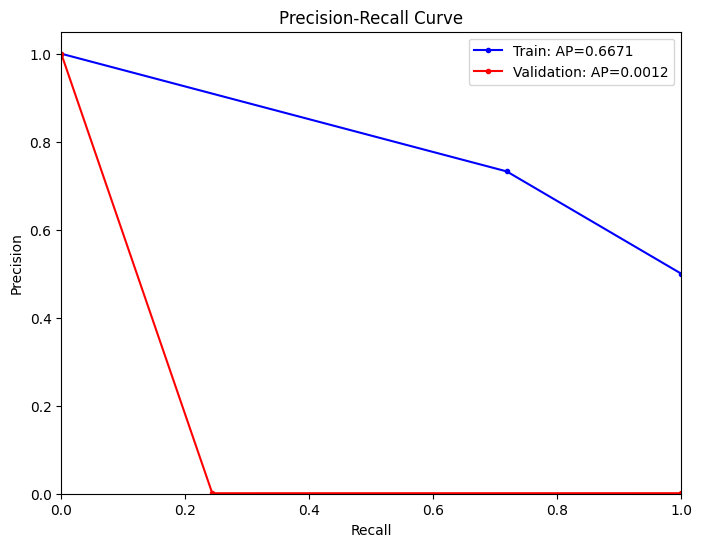

Training Set Confusion Matrix:
[[5902959 2100056]
 [2252570 5750445]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73   8003015
           1       0.73      0.72      0.73   8003015

    accuracy                           0.73  16006030
   macro avg       0.73      0.73      0.73  16006030
weighted avg       0.73      0.73      0.73  16006030

Training Set F-beta (beta=2) score: 0.7213

Validation Set Confusion Matrix:
[[589798 210503]
 [   727    234]]

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    800301
           1       0.00      0.24      0.00       961

    accuracy                           0.74    801262
   macro avg       0.50      0.49      0.43    801262
weighted avg       1.00      0.74      0.85    801262

Validation Set F-beta (beta=2) score: 0.0055


In [102]:
# Oversampled dataset
evaluation_model(lgbm_model8, X_train_oversampled, y_train_oversampled, X_val_selection, y_val, beta=2)

## Logistic Regression

Sharing only results from experiment without PCA, as those were too low:

| Methods | Training(F1) | Validation(F1) |
|----------|----------|----------|
| MinMaxScaler  | - | 0.19  |
| MinMaxScaler, SMOTE  | 0.93   | 0.03   |
| PolynomialFeatures, MinMaxScaler| - |  0.75 |
| PolynomialFeatures, MinMaxScaler, SMOTE  | 0.99 |   0.54 |
| StandardScaler, SMOTE | 0.93 |   0.35 |

There's a tendency of model's scoring on the validation set to be significantly lower than the training set predictions. This means the model has overfit on the training data, it has learned it too well, and has high variance, so it can't generalize well on new data.

In [ ]:
# We use this pipeline before the train/test split
preprocessing_whole_dataset_lr = Pipeline([
    ('amount_processing', FunctionTransformer(amount_object_to_numeric, validate=False)), # turns amount into numerical
    ('fraud_numeric', FunctionTransformer(fraud_numeric, validate=False)), # turns fraud indicator into numerical
    ('mcc_to_category', FunctionTransformer(mcc_to_category, validate=False)), # merchant codes to less categories
    ('time_processing', FunctionTransformer(time_processing, validate=False)), # creates TimeInMinutes and hour column
    ('zip_to_latlng', FunctionTransformer(zip_to_latlng, validate=False)), # zip code to latitude and longtitude columns
    ('drop_columns', FunctionTransformer(drop_columns_wfraud, validate=False)), #Drops 'Merchant City', 'MCC', 'Minute', 'Is Fraud?' columns
    ('ttype_error_dummies', FunctionTransformer(ttype_error_dummies, validate=False)), #Transaction types(Use chip), and Errors? encoding
    ('string_encoding', string_encoding)
        ] 
)

In [7]:
tf_transactions = preprocessing_whole_dataset_lr.fit_transform(transactions)

print(tf_transactions)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
tf_transactions.shape

(295448, 129)

In [8]:
#We use our original dataframe to extract the target, because we had to remove the target 'Is Fraud?' column during the preprocessing stage as our dataframe converted into a numpy array and it would've been an issue finding the target column in that form

X = tf_transactions
y = transactions['Is Fraud?'].values 

# Create a train-test split (60-40)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Further split the temporary set into validation and test sets (40-60 of the remaining data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, stratify=y_temp, random_state=42)

# Display the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 177268
Validation set size: 47272
Test set size: 70908


In [9]:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_val_mm = scaler.transform(X_val)
X_test_mm = scaler.transform(X_test)

In [15]:
# GridSearchCV for best hyperparameters
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create the grid search
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train_mm, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1 score: {:.2f}".format(grid_search.best_score_))

best_model_lr = grid_search.best_estimator_

Best hyperparameters:  {'C': 10, 'penalty': 'l2'}
Best F1 score: 0.19


In [11]:
# Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = smote.fit_resample(X_train_mm, y_train)

In [19]:
lr_model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create the grid search
grid_search_resampled = GridSearchCV(lr_model, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search_resampled.fit(X_resampled, y_resampled)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search_resampled.best_params_)
print("Best F1 score: {:.2f}".format(grid_search_resampled.best_score_))

best_model_lr = grid_search_resampled.best_estimator_

Best hyperparameters:  {'C': 100, 'penalty': 'l2'}
Best F1 score: 0.93


### Weighted Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

class_weights = {0: 1, 1: 9} 

model2 = LogisticRegression(class_weight=class_weights)
model2.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(class_weight={0: 1, 1: 9})

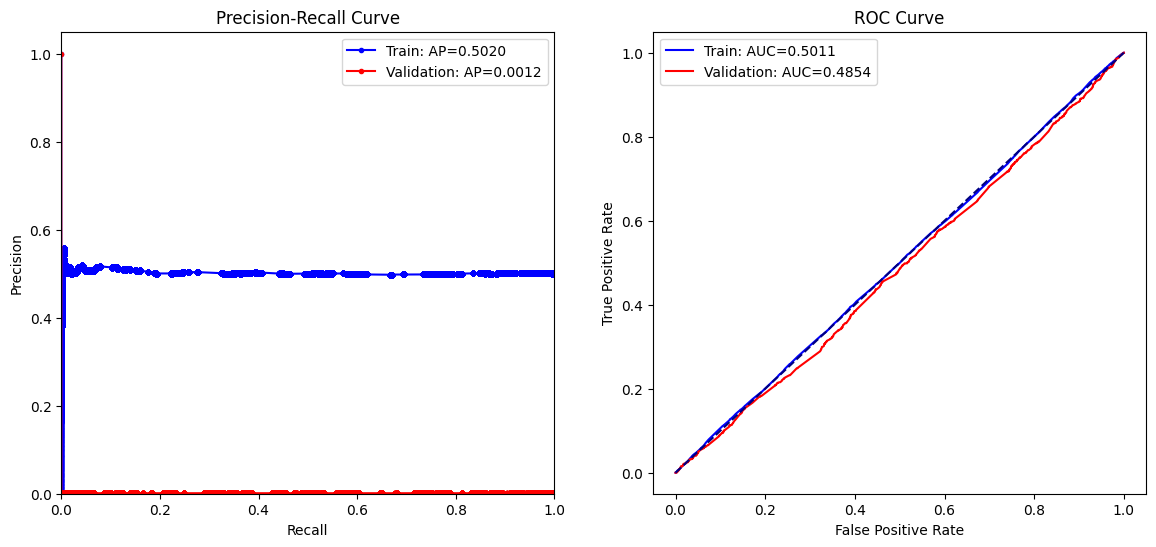


Training Set Confusion Matrix:
[[3643831 4359184]
 [3636119 4366896]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48   8003015
           1       0.50      0.55      0.52   8003015

    accuracy                           0.50  16006030
   macro avg       0.50      0.50      0.50  16006030
weighted avg       0.50      0.50      0.50  16006030

Training Set F2 (beta=2) score: 0.5360

Validation Set Confusion Matrix:
[[364884 435417]
 [   452    509]]

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63    800301
           1       0.00      0.53      0.00       961

    accuracy                           0.46    801262
   macro avg       0.50      0.49      0.31    801262
weighted avg       1.00      0.46      0.63    801262

Validation Set F2 (beta=2) score: 0.0058


In [78]:
model_results(model2, X_train_oversampled, y_train_oversampled, X_val_selection, y_val, beta=2)

### Logistic Regression with Polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_resampled)
X_val_poly = poly.transform(X_val_selection)

In [31]:
model_lr = LogisticRegression(C=10, solver='liblinear', random_state=42)

model_lr.fit(X_train_poly, y_train_resampled)

# Predict on the testing set
y_pred = model_lr.predict(X_val_poly)
print("Random Forest Classifier Results:")
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23612
           1       0.00      0.00      0.00        24

    accuracy                           1.00     23636
   macro avg       0.50      0.50      0.50     23636
weighted avg       1.00      1.00      1.00     23636

[[23604     8]
 [   24     0]]


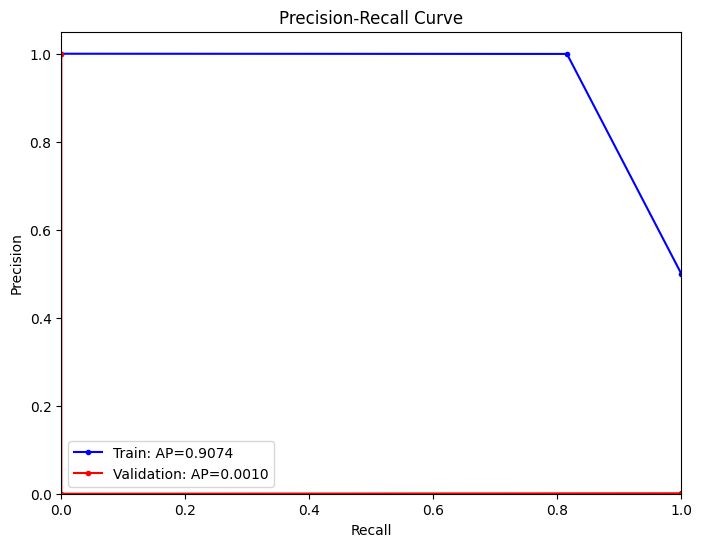

Training Set Confusion Matrix:
[[236028     89]
 [ 43542 192575]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92    236117
           1       1.00      0.82      0.90    236117

    accuracy                           0.91    472234
   macro avg       0.92      0.91      0.91    472234
weighted avg       0.92      0.91      0.91    472234

Training Set F-beta (beta=2) score: 0.8468

Validation Set Confusion Matrix:
[[23604     8]
 [   24     0]]

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23612
           1       0.00      0.00      0.00        24

    accuracy                           1.00     23636
   macro avg       0.50      0.50      0.50     23636
weighted avg       1.00      1.00      1.00     23636

Validation Set F-beta (beta=2) score: 0.0000


In [33]:
evaluation_model(model_lr, X_train_poly, y_train_resampled, X_val_poly, y_val, beta=2)

In [14]:
model_lr = LogisticRegression(C=10, solver='liblinear', class_weight={0: 1, 1: 10}, random_state=42)

model_lr.fit(X_train_poly, y_train_resampled)

# Predict on the testing set
y_pred = model_lr.predict(X_val_poly)
print("Random Forest Classifier Results:")
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03     23612
           1       0.00      1.00      0.00        24

    accuracy                           0.02     23636
   macro avg       0.50      0.51      0.02     23636
weighted avg       1.00      0.02      0.03     23636

[[  388 23224]
 [    0    24]]


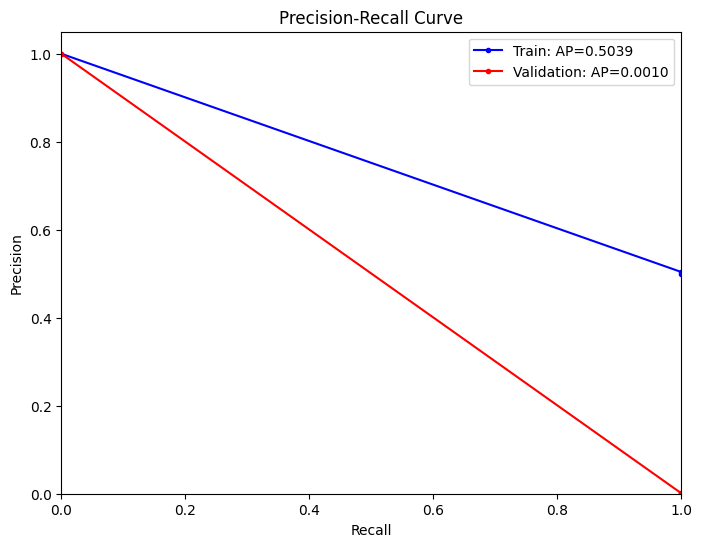

Training Set Confusion Matrix:
[[  3665 232452]
 [     0 236117]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03    236117
           1       0.50      1.00      0.67    236117

    accuracy                           0.51    472234
   macro avg       0.75      0.51      0.35    472234
weighted avg       0.75      0.51      0.35    472234

Training Set F-beta (beta=2) score: 0.8355

Validation Set Confusion Matrix:
[[  388 23224]
 [    0    24]]

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03     23612
           1       0.00      1.00      0.00        24

    accuracy                           0.02     23636
   macro avg       0.50      0.51      0.02     23636
weighted avg       1.00      0.02      0.03     23636

Validation Set F-beta (beta=2) score: 0.0051


In [18]:
evaluation_model(model_lr, X_train_poly, y_train_resampled, X_val_poly, y_val, beta=2)

# Random Forest

__Oversampling strategy__

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short. <br>
[More info about SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [6]:
# We use this pipeline before the train/test split
preprocessing_whole_dataset = Pipeline([
    ('amount_processing', FunctionTransformer(amount_preprocessing, validate=False)), # turns amount into numerical
    ('fraud_numeric', FunctionTransformer(fraud_numeric, validate=False)), # turns fraud indicator into numerical
    ('mcc_to_category', FunctionTransformer(mcc_to_category, validate=False)), # merchant codes to less categories
    ('time_processing', FunctionTransformer(time_processing, validate=False)), # creates TimeInMinutes and hour column
    ('zip_to_latlng', FunctionTransformer(zip_to_latlng, validate=False)) # zip code to latitude and longtitude columns
] 
)


# OneHotEncoder pipeline
columns_to_encode_v1 = ['Category', 'Use_Chip']
numerical_columns = ['User', 'Card', 'Year', 'Month', 'Day', 'Amount',
       'Merchant_Name', 'MCC',
       'Is_Fraud?', 'TimeInMinutes', 'Hour', 'Minute', 'LAT',
       'LNG', 'AvgDailyTransactions', 'AvgDailyTransactionsPerCard']

string_encoding = ColumnTransformer(
    transformers=[
        ('errors', MultiLabelBinarizerTransformer(), ['Errors?']),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), columns_to_encode_v1)
    ],
    remainder='passthrough'  # This includes any columns not specified in the transformers
)

# This pipeline is used when you want to transform the categoricals with OneHotEncoding
preprocessing_split_encoding = Pipeline([
    ('pre_feature_engineering', FunctionTransformer(pre_feature_engineering, validate=False)), #Adds new features
    #('amount_scaler', FunctionTransformer(amount_scaler, validate=False)), #
    ('rank_date', FunctionTransformer(rank_date, validate=False)), #Ordinal representation of the data
    ('drop_columns', FunctionTransformer(drop_columns, validate=False)), #Drops 'Merchant City', 'MCC', 'Minute' columns
    ('string_encoding', string_encoding)
        ] 
)

In [7]:
tf_transactions = preprocessing_whole_dataset.fit_transform(transactions1)

print(tf_transactions)

          User  Card  Year  Month  Day  Amount           Use_Chip  \
0            0     0  2002      9    1  134.09  Swipe Transaction   
1            0     0  2002      9    1   38.48  Swipe Transaction   
2            0     0  2002      9    2  120.34  Swipe Transaction   
3            0     0  2002      9    2  128.95  Swipe Transaction   
4            0     0  2002      9    3  104.71  Swipe Transaction   
...        ...   ...   ...    ...  ...     ...                ...   
10015777   845     1  2020      2   27   19.83  Swipe Transaction   
10015778   845     1  2020      2   27   41.15  Swipe Transaction   
10015779   845     1  2020      2   28   19.33  Swipe Transaction   
10015780   845     1  2020      2   28   48.50  Swipe Transaction   
10015781   845     1  2020      2   28   61.00  Swipe Transaction   

                Merchant_Name    Merchant_City Merchant_State   MCC Errors?  \
0         3527213246127876953         La Verne             CA  5300     NaN   
1         -72

In [31]:
tf_transactions.columns 

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Use_Chip',
       'Merchant_Name', 'Merchant_City', 'Merchant_State', 'MCC', 'Errors?',
       'Is_Fraud?', 'Category', 'TimeInMinutes', 'Hour', 'Minute', 'LAT',
       'LNG'],
      dtype='object')

In [9]:
X = tf_transactions.drop('Is_Fraud?', axis=1)
y = tf_transactions['Is_Fraud?']

# Create a train-test split (80-20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Further split the temporary set into validation and test sets (40-60 of the remaining data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, stratify=y_temp, random_state=42)

# Display the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 8012625
Validation set size: 801262
Test set size: 1201895


In [10]:
X_train_selection = preprocessing_split_encoding.fit_transform(X_train)

In [43]:
X_train_selection.shape

(8012625, 26)

In [11]:
X_val_selection = preprocessing_split_encoding.transform(X_val)

In [45]:
X_val_selection.shape

(801262, 26)

In [46]:
# Get the column names
errors_names = preprocessing_split_encoding.named_steps['string_encoding'].named_transformers_['errors'].get_feature_names_out()
onehotencoded_names = preprocessing_split_encoding.named_steps['string_encoding'].named_transformers_['onehot'].get_feature_names_out(columns_to_encode_v1)

errors_names_np = np.array(errors_names)
onehotencoded_names_np = np.array(onehotencoded_names)

print(errors_names_np)
print(onehotencoded_names_np)

['Bad CVV' 'Bad Card Number' 'Bad Expiration' 'Bad PIN' 'Bad Zipcode'
 'Insufficient Balance' 'Technical Glitch']
['Category_business' 'Category_clothing' 'Category_contracted'
 'Category_government' 'Category_misc' 'Category_professional'
 'Category_retail outlet' 'Category_transportation' 'Category_travel'
 'Category_utility' 'Use_Chip_Chip Transaction'
 'Use_Chip_Online Transaction' 'Use_Chip_Swipe Transaction']


In [71]:
# List of all feature names after applying all the transformations, to be used for Feature Importances later
original_features = tf_transactions.columns.tolist()
features_to_encode = ['Category', 'Use_Chip', 'Errors?']# Columns to be one-hot encoded
features_to_drop = ['Merchant_City', 'MCC', 'Minute', 'Merchant_State', 'Is_Fraud?']
unencoded_features = [feat for feat in original_features if feat not in features_to_encode and feat not in features_to_drop]
engineered_features = ['AvgDailyTransactions', 'AvgDailyTransactionsPerCard', 'Ordinal_date', ' No error']
all_features = unencoded_features + list(engineered_features) + list(errors_names_np) + list(onehotencoded_names_np)
print(all_features)
all_features = np.array(all_features)

['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Merchant_Name', 'TimeInMinutes', 'Hour', 'LAT', 'LNG', 'AvgDailyTransactions', 'AvgDailyTransactionsPerCard', 'Ordinal_date', ' No error', 'Bad CVV', 'Bad Card Number', 'Bad Expiration', 'Bad PIN', 'Bad Zipcode', 'Insufficient Balance', 'Technical Glitch', 'Category_business', 'Category_clothing', 'Category_contracted', 'Category_government', 'Category_misc', 'Category_professional', 'Category_retail outlet', 'Category_transportation', 'Category_travel', 'Category_utility', 'Use_Chip_Chip Transaction', 'Use_Chip_Online Transaction', 'Use_Chip_Swipe Transaction']


In [19]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [49]:
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_selection, y_train)

In [50]:
y_train_oversampled.value_counts()

Is_Fraud?
0    8003015
1    8003015
Name: count, dtype: int64

In [37]:
%%time
param_grid = {
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.5, 0.8]
}

# Create GridSearchCV object with Random Forest classifier and parameter grid
grid_search2 = GridSearchCV(estimator=rf_model3, param_grid=param_grid, cv=5, scoring='recall')

# Fit the GridSearchCV object to the training data
grid_search2.fit(X_train_oversampled, y_train_oversampled)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search2.best_params_)
print("Best Accuracy:", grid_search2.best_score_)

Best Parameters: {'max_features': 0.5}
Best Accuracy: 0.9994240055805644
CPU times: user 5h 55min 59s, sys: 2min 39s, total: 5h 58min 39s
Wall time: 5h 59min 50s


# Feature Importances

The Random Forest model that overfit on the data displayed these feature importances, these are the features that were used by the model to make correct predictions. We'll do feature selection based on these results, and our previous Data Exploration and train another model.
- Category - former MCC
- Errors - that occured during transaction such as technical glitch, bad pin, insufficient balance, bad zipcode, bad expiration, bad cvv etc.
- Use Chip - showing whether the transaction is online, chip or swipe
- AvgDailyTransactionsPerCard - if there is fraud the average daily transactions of a user possibly will increase
- Hour - during the data exploration stage we noticed peak in fraud in certain timeframes
- Amount - During the Data Exploration we noticed Amount would sometimes increase in fraud transactions

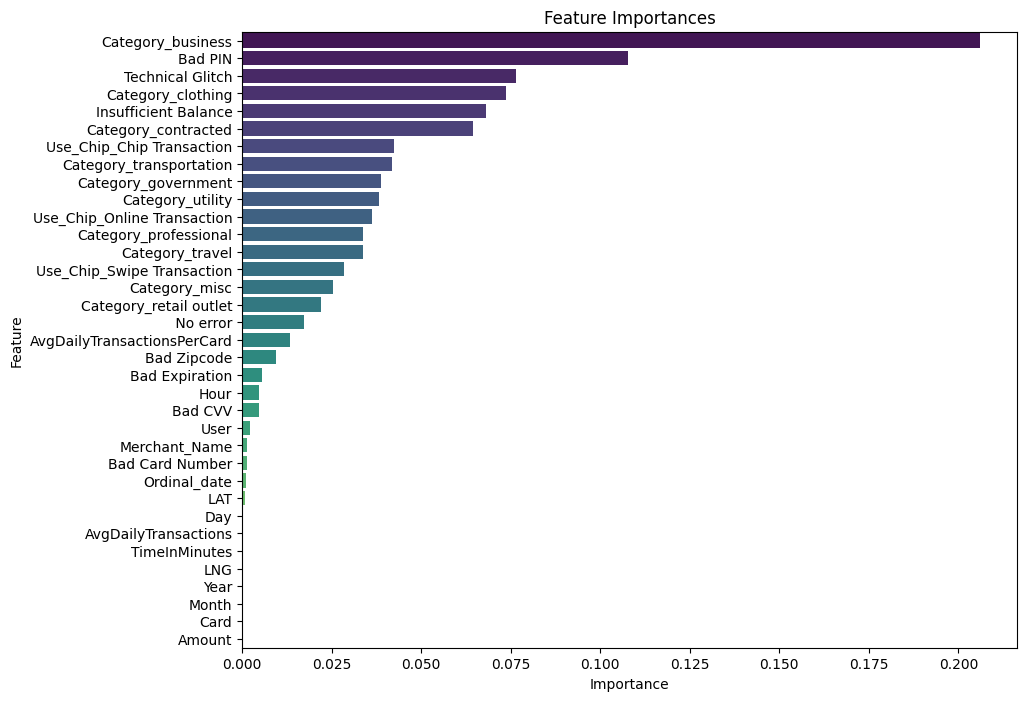

In [75]:
import seaborn as sns

feature_importances = rf_model6.feature_importances_

#Correlating original feature names with model features
importances_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model10 = RandomForestClassifier()

In [51]:
%%time
rf_model10.fit(X_train_oversampled, y_train_oversampled)

y_train_pred = rf_model10.predict(X_train_oversampled)

y_val_pred = rf_model10.predict(X_val_selection)

CPU times: user 1h 28min 56s, sys: 43.4 s, total: 1h 29min 39s
Wall time: 1h 30min 6s


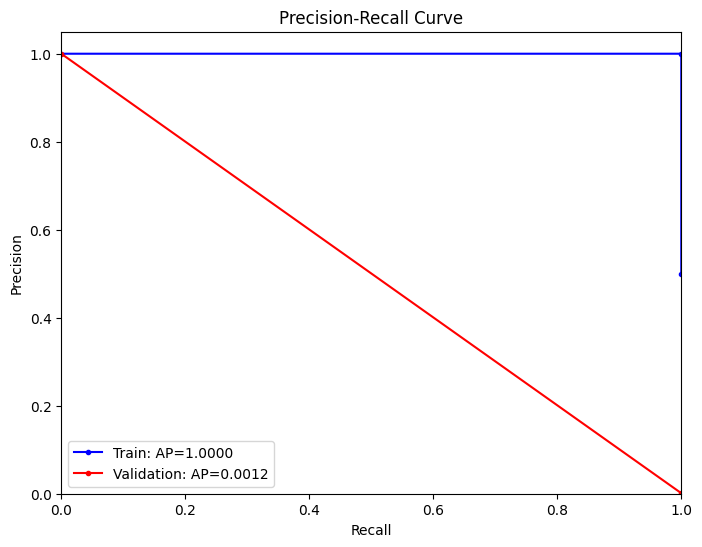

Training Set Confusion Matrix:
[[8003015       0]
 [     19 8002996]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   8003015
           1       1.00      1.00      1.00   8003015

    accuracy                           1.00  16006030
   macro avg       1.00      1.00      1.00  16006030
weighted avg       1.00      1.00      1.00  16006030

Training Set F-beta (beta=2) score: 1.0000

Validation Set Confusion Matrix:
[[800301      0]
 [   961      0]]

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    800301
           1       0.00      0.00      0.00       961

    accuracy                           1.00    801262
   macro avg       0.50      0.50      0.50    801262
weighted avg       1.00      1.00      1.00    801262

Validation Set F-beta (beta=2) score: 0.0000


In [64]:
#Scores from Random Forest Classifier with default params on oversampled data
evaluation_model(rf_model10, X_train_oversampled, y_train_oversampled, X_val_selection, y_val, beta=2)

### Random Forest with Undersampling

In [32]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train_selection, y_train)

X_val_resampled, y_val_resampled = rus.fit_resample(X_val_selection, y_val)

In [34]:
y_train_resampled.value_counts()

Is_Fraud?
0    9610
1    9610
Name: count, dtype: int64

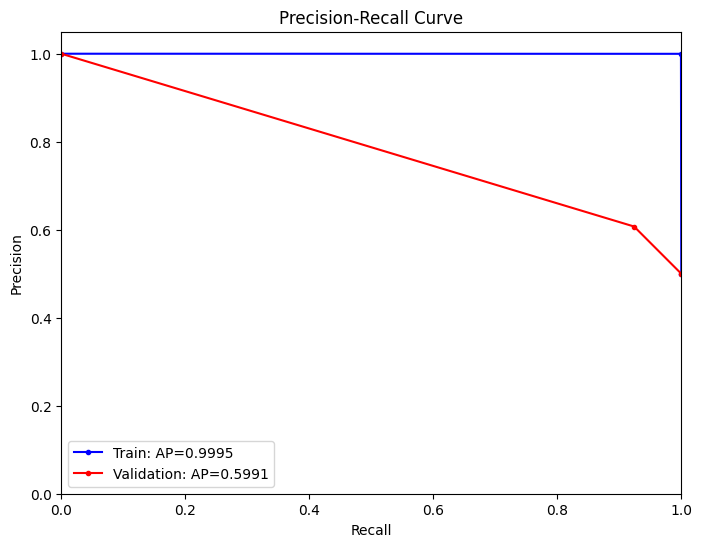

Training Set Confusion Matrix:
[[9608    2]
 [   5 9605]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9610
           1       1.00      1.00      1.00      9610

    accuracy                           1.00     19220
   macro avg       1.00      1.00      1.00     19220
weighted avg       1.00      1.00      1.00     19220

Training Set F-beta (beta=2) score: 0.9995

Validation Set Confusion Matrix:
[[ 677 1005]
 [ 128 1554]]

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.40      0.54      1682
           1       0.61      0.92      0.73      1682

    accuracy                           0.66      3364
   macro avg       0.72      0.66      0.64      3364
weighted avg       0.72      0.66      0.64      3364

Validation Set F-beta (beta=2) score: 0.8367
CPU times: user 2.63 s, sys: 33.8 ms, total: 2.67 s
Wall time: 

In [41]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_model2 = RandomForestClassifier(bootstrap=False, 
                                   max_depth=30,
                                   max_features='sqrt',
                                   min_samples_leaf=1, 
                                   min_samples_split=5, 
                                   n_estimators=100)

rf_model2.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_model2.predict(X_train_resampled)

y_val_pred = rf_model2.predict(X_val_resampled)

evaluation_model(rf_model2, X_train_resampled, y_train_resampled, X_val_resampled, y_val_resampled, beta=2)

### Random Forest Evaluation

On all the instances I tested, model is overfitting, and has high variance both when Undersampled, and Oversampled. You can determine that from the 1.00 score on recall, this score is too improbable; additionally
the train set has way better scores than the validation set, which is a sign the model is overfitting. It has probably memorized the training data, and can't generalize well. Even when I limited the depth of the tree, and adjusted other hyperparameters it was overfit. In general it's not okay to use such low amount of data, almost always the model will just memorize. <br>

Best results were when the dataset was Undersampled, the regular transactions were undersampled to be equal to the fraud transactions, we achieved F2 score of 0.83.

#### Why does overfitting occur? <br>

You only get accurate predictions if the machine learning model generalizes to all types of data within its domain. Overfitting occurs when the model cannot generalize and fits too closely to the training dataset instead. Overfitting happens due to several reasons, such as:
 - The training data size is too small and does not contain enough data samples to accurately represent all possible input data values.
 - The training data contains large amounts of irrelevant information, called noisy data.
 - The model trains for too long on a single sample set of data.
 - The model complexity is high, so it learns the noise within the training data.

#### Permutation Importance

A really useful method for reducing overfitting is feature selection which can be achieved by the __Permutation Importance__ function, it assesses the importance of a feature by measuring the decrease in model performance (e.g., accuracy, F1 score) when the values of that feature are randomly shuffled. If shuffling a particular feature leads to a significant drop in model performance, that feature is considered important. The more repetitions you specify (n_repeats), the more accurate the estimate of permutation importances, but it also increases the computational cost. However the data we used is high-dimensional and it takes hours to calculate. I'll leave the code below if you're curious.


  [ from sklearn.inspection import permutation_importance
#perm_importance = permutation_importance(rf_model, X_val_selection, y_val, n_repeats=2, random_state=42)<br>
feature_names = X.columns  #Names of the columns in the dataset <br>
perm_importance_scores = perm_importance.importances_mean <br>
feature_importance_dict = dict(zip(feature_names, perm_importance_scores)) #Create dictionary <br>
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True) #Sort the dictionary by importance scores <br>
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.4f}') #Display feature importances ]

Otherwise we can get the __Feature Importances__ directly and see how much they contributed to the decisions of the model. They are calculated based on the contribution of each feature to the reduction in impurity during the construction of the trees in the forest. The most common measure used for this purpose is the Gini impurity.
 - Gini impurity is a measure of how often a randomly chosen element would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the node. It ranges from 0 (pure node) to 0.5 (impure node).
 - The decrease in Gini impurity is used as a criterion for selecting the best feature to split on at each node of the decision trees in the Random Forest.
 - For each tree in the Random Forest, the total decrease in Gini impurity across all nodes where a particular feature is used for splitting is recorded.
 - The feature importance for a specific feature is the average (or sum, depending on the implementation) of the decrease in Gini impurity over all the trees in the forest.

# Conclusion

We tested different ML techniques like dimensionality reduction, resampling, scaling, encoding and evaluated this approach with models. Unfortunately for the moment there is no model that does a satisfactory job on generalizing on these datasets. So far the models either underfit (low F1 score) or overfit (high F1 score), however they have high variance, and learn the training data too well, capturing noise and specific patterns that do not generalize well to new, unseen data, which causes low scores when predicting on the validation set. To improve our models we can work on:
 - __Dataset__ with Feature importances, feature engineering, feature selection, PolyNomial Features - removing irrelevant or redundant features may help improve generalization
     - Notice how the score on Logistic Regression + Polynomial features without oversampling improved the model's capability to predict the negative class, and in turn it could predict the positive class with F1 score 0.5, still chaotic but better than other scores
 - __Models and hyperparameter tuning__ - choose a different, less complex model; test different levels of regularization
    - We could also try __ensemble modeling__ - which would combine two or more related but different analytical models and then synthesize the results into a single score.
 - __Size of data__ - if we train the model with more data it will learn the patterns better


# References
[1]. [Seventh report on card fraud](https://www.ecb.europa.eu/pub/pdf/cardfraud/ecb.cardfraudreport202110~cac4c418e8.en.pdf), ECB, October 2021 <br>
[2]. [Fraud Detection: Types Of Fraud, Detection Techniques & Systems](https://www.hyperverge.co/blog/types-of-fraud-detection-techniques-systems), article <br>
[3]. [Fraud Detection Methods](https://financialcrimeacademy.org/fraud-detection-methods/#:~:text=Pattern%20recognition%20algorithms%20detect%20approximate,used%20for%20fraud%20detection%20purposes), article <br> 
[4]. [How Banks Conduct Transaction Fraud Investigations](https://www.chargebackgurus.com/blog/transaction-fraud-investigations#:~:text=dispute%20is%20filed.-,How%20Do%20Banks%20Investigate%20Fraud%3F,was%20involved%20in%20the%20transaction), article <br>
[5]. [Payment Fraud](https://www.europol.europa.eu/crime-areas-and-statistics/crime-areas/forgery-of-money-and-means-of-payment/payment-fraud), article<br>
[6]. [Card fraud in Europe declines significantly](https://www.ecb.europa.eu/press/pr/date/2023/html/ecb.pr230526~f09bc3c664.en.html), article<br>
[7]. [Identity Theft and Credit Card Fraud Statistics](https://www.fool.com/the-ascent/research/identity-theft-credit-card-fraud-statistics/#:~:text=389%2C845-,Data%20source%3A%20Federal%20Trade%20Commission%20(2022).,increase%20from%202018%20to%202019), article <br>
[8]. Complete Guide to Transaction Monitoring.pdf, by [Sumsub](https://sumsub.com/) <br>
[9]. [An Easy Guide to Choose the Right Machine Learning Algorithm](https://www.kdnuggets.com/2020/05/guide-choose-right-machine-learning-algorithm.html), article <br>
[10]. [Softuni Data Science Training](https://softuni.bg/trainings/4059/data-science-june-2023), by Yordan Darakchiev <br>
[11]. [Solving financial fraud detection with machine learning methods](https://www.avenga.com/magazine/fraud-detection-machine-learning/), article<br>
[12]. [Feature Importance: 7 Methods and a Quick Tutorial](https://www.aporia.com/learn/feature-importance/feature-importance-7-methods-and-a-quick-tutorial/), article by Noa Azaria <br>
[13]. [Evaluating categorical encoding methods on a real credit card fraud
detection database](https://arxiv.org/pdf/2112.12024.pdf), by François de la Bourdonnaye, Fabrice Daniel <br>
[14]. [What is Overfitting?](https://aws.amazon.com/what-is/overfitting/), article by Amazon <br>
[15]. [Softuni Machine Learning Training](https://softuni.bg/opencourses/machine-learning), by Yordan Darakchiev<br>
[16]. [How to build a real-time fraud detection system](https://www.tinybird.co/blog-posts/how-to-build-a-real-time-fraud-detection-system), by Joe Karlsson, TinyBird
